In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold ,GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score, classification_report, accuracy_score
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [3]:
RS = 52

In [4]:
# TRAIN_PREPROCCESED = False
# TEST_PREPROCCESED = False

# 1. Data exploration

In [5]:
train_df = pd.read_csv('train.csv')  

In [6]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,label
0,1.170981,5.672133,0.6,80.0,76.0,D,a21,1.107143,0.692857,5,...,13.9,12.2,D,D,28.0,7.0,2011,40.0,15.420787,1
1,2.595788,23.203289,6.4,43.0,64.0,N,a9,1.700000,0.614286,11,...,18.6,16.5,N,I,61.0,43.0,2012,110.0,240.496883,0
2,0.972794,7.127348,0.4,63.0,100.0,C,a4,1.242857,0.428571,6,...,16.5,9.6,M,NaN,15.0,7.0,2012,0.0,224.282903,0
3,1.891667,17.881507,4.2,65.0,71.0,K,a15,1.050000,0.671429,10,...,14.2,11.4,K,D,39.0,24.0,2010,130.0,86.810830,0
4,1.965881,13.936969,3.2,40.0,62.0,F,a1,1.950000,1.085714,3,...,26.6,23.4,C,NaN,30.0,20.0,2011,0.0,120.642922,0


In [7]:
train_df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       'label'],
      dtype='object')

In [8]:
train_df.describe()

,0,1,2,3,4,7,8,9,10,11,12,15,16,17,20,21,22,23,24,label
count,22161.000000,22161.000000,22161.000000,22102.000000,22057.000000,22154.000000,22143.000000,22161.000000,22161.000000,22055.000000,22048.000000,20290.000000,22133.000000,22109.000000,20816.000000,22062.000000,22161.000000,22061.000000,22061.000000,22161.000000
mean,2.185958,19.797754,4.929620,51.547009,68.497982,1.648476,0.888041,6.429358,0.228284,1015.347014,1017.708572,73.685017,21.617133,17.065837,39.995484,19.101577,2010.945264,146.971579,224.835441,0.236451
std,0.815080,10.763614,3.572644,20.184353,18.231315,0.480275,0.461375,3.381488,0.161565,7.011856,7.085807,37.866780,6.602743,6.409174,13.150807,8.546933,0.823740,86.609704,160.801099,0.424912
min,-0.490607,2.437300,0.000000,1.000000,3.000000,0.450000,-0.492857,1.000000,-0.195661,984.500000,983.700000,0.000000,3.900000,-0.700000,11.000000,0.000000,2010.000000,0.000000,0.001355,0.000000
25%,1.622068,12.268371,2.400000,37.000000,57.000000,1.271429,0.542857,3.000000,0.136002,1010.600000,1013.000000,45.000000,16.500000,12.100000,31.000000,13.000000,2010.000000,90.000000,100.144819,0.000000
50%,2.167701,17.833216,4.200000,52.000000,69.000000,1.607143,0.864286,7.000000,0.206457,1015.300000,1017.700000,82.000000,21.000000,16.600000,39.000000,19.000000,2011.000000,130.000000,199.866581,0.000000
75%,2.720341,25.196446,6.600000,65.000000,82.000000,2.007143,1.242857,9.000000,0.278929,1020.000000,1022.400000,104.000000,26.400000,21.800000,48.000000,24.000000,2012.000000,200.000000,316.118054,0.000000
max,9.092011,248.877854,81.200000,100.000000,100.000000,3.435714,2.128571,12.000000,0.954076,1038.900000,1040.900000,143.000000,46.100000,36.900000,135.000000,69.000000,2012.000000,670.000000,1426.459838,1.000000


In [9]:
# X_train = train_df.values[:,:-1]
# Y_train = train_df.label
# #print(X_train)

In [10]:
train_df['5'].value_counts(dropna=False)

D      1604
F      1575
E      1558
I      1485
P      1475
K      1469
B      1432
NaN    1349
L      1337
C      1330
O      1241
M      1239
N      1098
A      1097
H      1010
G       952
J       910
Name: 5, dtype: int64

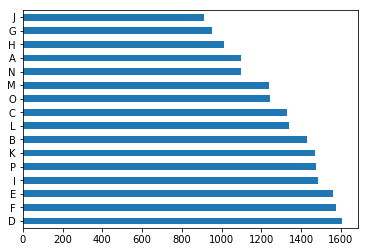

In [11]:
train_df['5'].unique()
train_df['5'].value_counts().plot.barh()
plt.show()

In [12]:
train_df['6'].unique()

array(['a21', 'a9', 'a4', 'a15', 'a1', 'a28', 'a18', 'a12', 'a29', 'a26',
       'a0', 'a22', 'a19', 'a25', 'a3', 'a6', 'a14', 'a10', 'a17', 'a2',
       'a11', 'a30', 'a8', 'a7', 'a13', 'a20', 'a27', 'a16', 'a24', 'a5',
       'a23'], dtype=object)

In [13]:
train_df['19'].unique()
train_df['19'].value_counts(dropna=False)

E      1861
F      1559
I      1405
O      1396
C      1385
P      1373
D      1343
L      1303
A      1276
G      1272
M      1235
J      1216
K      1174
N      1139
B      1108
H      1096
NaN    1020
Name: 19, dtype: int64

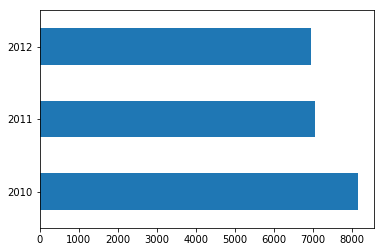

In [14]:
train_df['22'].unique()
train_df['22'].value_counts().plot.barh()
plt.show()

In [15]:
train_df.values[:,10:16]

array([[0.7029565091569183, 1024.1, 1025.9, '0', '0.6mm', 32.0],
       [0.22391123528596296, 1005.3, 1008.1, '0', '0.0mm', 50.0],
       [0.1808477712703072, 1020.8, 1026.5, '0', '0.0mm', nan],
       ...,
       [0.07645985877831712, 1016.0, 1018.7, '1', '10.8mm', nan],
       [0.28443764673984395, 1008.5, 1010.5, '1', '2.6mm', 27.0],
       [0.265139748425138, 1033.1, 1037.1, '0', '0.0mm', 57.0]],
      dtype=object)

In [16]:
train_df.label.value_counts()

0    16921
1     5240
Name: label, dtype: int64

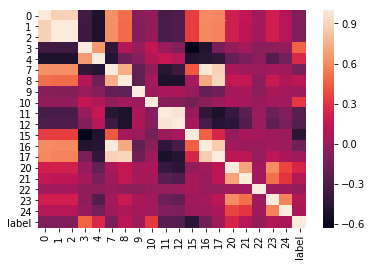

In [17]:
#train_df.corr()
sns.heatmap(train_df.corr(), 
        xticklabels=train_df.corr().columns,
        yticklabels=train_df.corr().columns)
plt.show()

In [18]:
#train_df.corr()

In [19]:
#train_df.dtypes

In [20]:
#train_df.isnull().sum()

Cleaning

In [21]:
train_df['6'].unique()

array(['a21', 'a9', 'a4', 'a15', 'a1', 'a28', 'a18', 'a12', 'a29', 'a26',
       'a0', 'a22', 'a19', 'a25', 'a3', 'a6', 'a14', 'a10', 'a17', 'a2',
       'a11', 'a30', 'a8', 'a7', 'a13', 'a20', 'a27', 'a16', 'a24', 'a5',
       'a23'], dtype=object)

In [22]:
def f6_preprocess(df):
    df['6'] = df['6'].map(lambda x: x.lstrip('a')).astype(float)
    print('Feature 6 was handled successfully!')
    return df

In [23]:
#print(train_df.values[897])
train_df['13'].value_counts()
#train_df['13'].dtypes

0          16906
1           5174
unknown       81
Name: 13, dtype: int64

In [24]:
def f14_preprocess(df):
    df['14'] = df['14'].map(lambda x: x.rstrip('m')).astype(float)
    print('Feature 14 was handled successfully!')
    return df

In [25]:
train_df['14'].value_counts()

0.0mm      13816
0.2mm       1364
0.4mm        651
0.6mm        441
0.8mm        360
1.0mm        269
1.2mm        242
1.4mm        226
1.6mm        194
1.8mm        180
2.0mm        160
2.8mm        145
2.2mm        145
2.4mm        134
2.6mm        131
3.4mm        119
3.0mm        116
3.2mm        107
3.8mm        105
3.6mm         92
4.0mm         84
4.4mm         81
nanmm         81
4.2mm         77
5.2mm         76
5.0mm         76
4.6mm         75
4.8mm         74
6.2mm         63
6.4mm         59
           ...  
54.4mm         1
55.2mm         1
0.5mm          1
44.8mm         1
68.8mm         1
52.4mm         1
66.4mm         1
11.9mm         1
62.0mm         1
64.8mm         1
45.0mm         1
60.6mm         1
56.8mm         1
88.6mm         1
29.9mm         1
55.0mm         1
62.2mm         1
46.8mm         1
54.2mm         1
60.4mm         1
48.4mm         1
33.2mm         1
36.6mm         1
43.6mm         1
77.4mm         1
113.0mm        1
59.6mm         1
50.8mm        

In [26]:
# sns.boxplot(train_df['14'][train_df['14'].notnull()])
# plt.show()

In [27]:
#train_df.dtypes

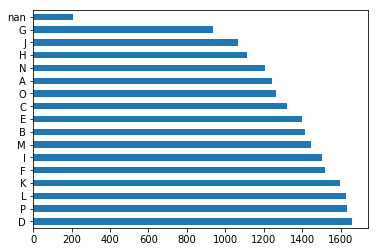

In [28]:
#train_df['18'].unique()
train_df['18'].value_counts(dropna=False).plot.barh()
plt.show()

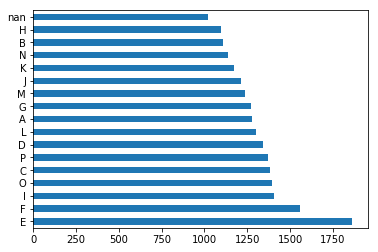

In [29]:
train_df['19'].value_counts(dropna=False).plot.barh()
plt.show()

### Feature 22

In [30]:
train_df['22'].unique()

array([2011, 2012, 2010])

In [31]:
def f22_preprocess(df):
    enc = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(enc.fit_transform(df[['22']]).toarray())
    enc_df.columns = ['2010','2011', '2012']
    df = df.join(enc_df)
    df = df.drop(columns=['22', '2012'])
    print('Feature 22 was handled successfully!')
    return df

In [32]:
train_df2 = train_df.copy()
train_df2 = f6_preprocess(train_df2)
train_df2 = f14_preprocess(train_df2)

Feature 6 was handled successfully!
Feature 14 was handled successfully!


In [33]:
train_df2.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
5         object
6        float64
7        float64
8        float64
9          int64
10       float64
11       float64
12       float64
13        object
14       float64
15       float64
16       float64
17       float64
18        object
19        object
20       float64
21       float64
22         int64
23       float64
24       float64
label      int64
dtype: object

In [34]:
train_df2.isnull().sum()

0           0
1           0
2           0
3          59
4         104
5        1349
6           0
7           7
8          18
9           0
10          0
11        106
12        113
13          0
14         81
15       1871
16         28
17         52
18        210
19       1020
20       1345
21         99
22          0
23        100
24        100
label       0
dtype: int64

In [35]:
train_df2.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
5         object
6        float64
7        float64
8        float64
9          int64
10       float64
11       float64
12       float64
13        object
14       float64
15       float64
16       float64
17       float64
18        object
19        object
20       float64
21       float64
22         int64
23       float64
24       float64
label      int64
dtype: object

In [36]:
train_df2['13']

0        0
1        0
2        0
3        0
4        0
5        0
6        1
7        1
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       1
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
22131    0
22132    0
22133    0
22134    0
22135    1
22136    0
22137    0
22138    0
22139    0
22140    0
22141    0
22142    0
22143    0
22144    1
22145    0
22146    0
22147    0
22148    1
22149    1
22150    0
22151    0
22152    0
22153    1
22154    1
22155    1
22156    1
22157    0
22158    1
22159    1
22160    0
Name: 13, Length: 22161, dtype: object

## Feature 13

In [37]:
def f13_preprocess(df):
    df['13'] = df['13'].replace({'unknown': 0}).astype(float)
    print('Feature 13 was handled successfully!')
    return df

In [38]:
train_df2['13'].value_counts()

0          16906
1           5174
unknown       81
Name: 13, dtype: int64

In [39]:
train_df2['13'].iloc[891]

'0'

## Final data

In [40]:
train_df2.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
5         object
6        float64
7        float64
8        float64
9          int64
10       float64
11       float64
12       float64
13        object
14       float64
15       float64
16       float64
17       float64
18        object
19        object
20       float64
21       float64
22         int64
23       float64
24       float64
label      int64
dtype: object

## Plotting & visualizations

### Initial Correlation Matrix

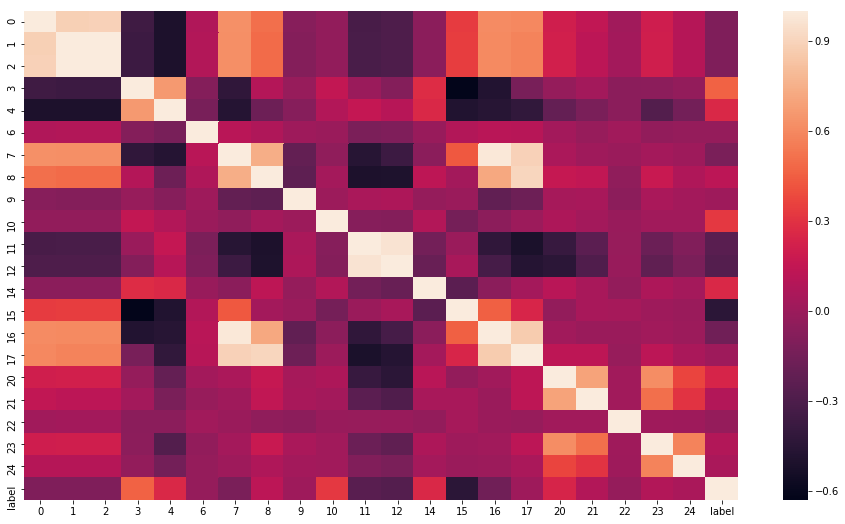

In [41]:
plt.subplots(figsize=(16, 9))
sns.heatmap(train_df2.corr(), 
        xticklabels=train_df2.corr().columns,
        yticklabels=train_df2.corr().columns)
plt.show()

### Features distribution 

In [42]:
sns.set(color_codes=True)

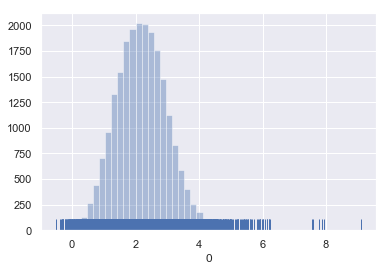

In [43]:
sns.distplot(train_df2['0'], kde=False, rug=True)
plt.show()

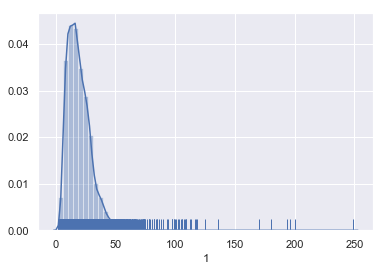

In [44]:
sns.distplot(train_df2['1'],bins=60, kde=1, rug=True)
plt.show()

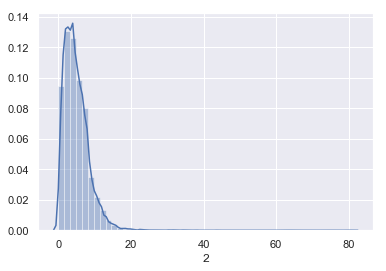

In [45]:
sns.distplot(train_df2['2'][train_df2['2'].notnull()])
plt.show()

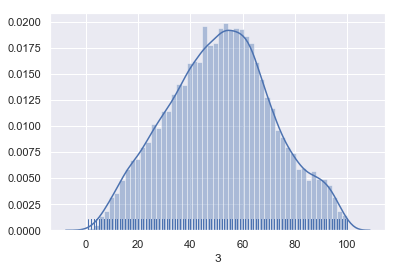

In [46]:
sns.distplot(train_df2['3'][train_df2['3'].notnull()], rug=True)
plt.show()

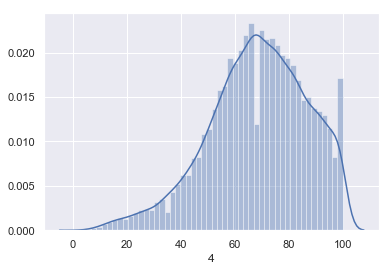

In [47]:
sns.distplot(train_df2['4'][train_df2['4'].notnull()])
plt.show()

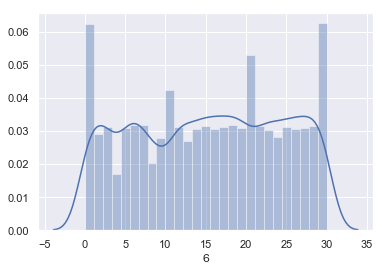

In [48]:
sns.distplot(train_df2['6'][train_df2['6'].notnull()])
plt.show()

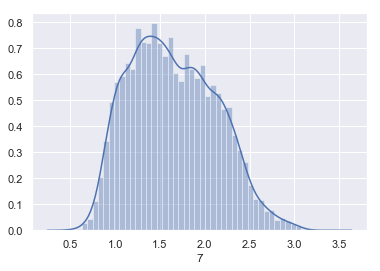

In [49]:
sns.distplot(train_df2['7'][train_df2['7'].notnull()])
plt.show()

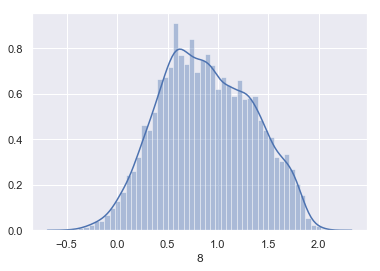

In [50]:
sns.distplot(train_df2['8'][train_df2['8'].notnull()])
plt.show()

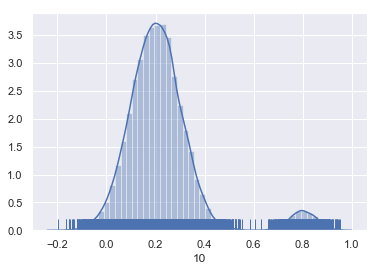

In [51]:
sns.distplot(train_df2['10'][train_df2['10'].notnull()],  rug=True)
plt.show()

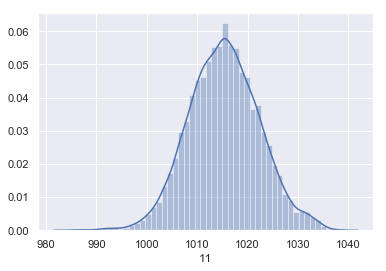

In [52]:
sns.distplot(train_df2['11'][train_df2['11'].notnull()])
plt.show()

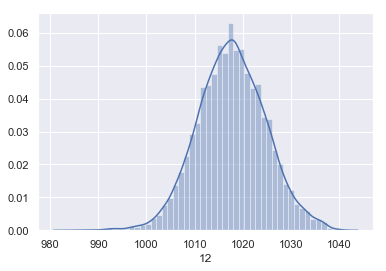

In [53]:
sns.distplot(train_df2['12'][train_df2['12'].notnull()])
plt.show()

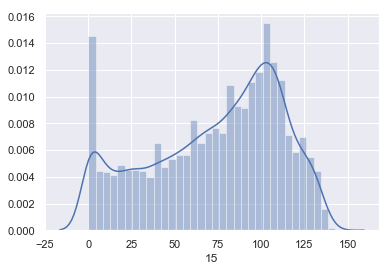

In [54]:
sns.distplot(train_df2['15'][train_df2['15'].notnull()])
plt.show()

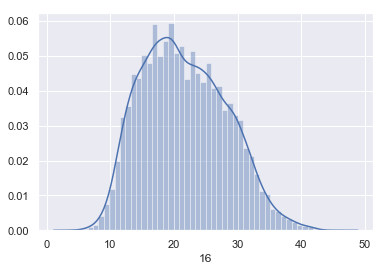

In [55]:
sns.distplot(train_df2['16'][train_df2['16'].notnull()])
plt.show()

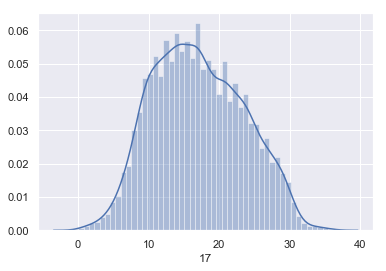

In [56]:
sns.distplot(train_df2['17'][train_df2['17'].notnull()])
plt.show()

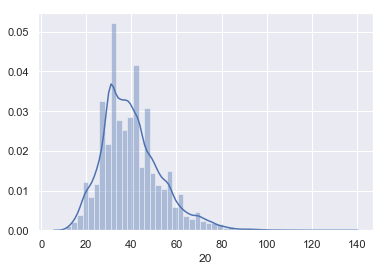

In [57]:
sns.distplot(train_df2['20'][train_df2['20'].notnull()])
plt.show()

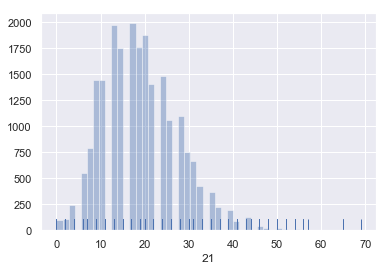

In [58]:
sns.distplot(train_df2['21'][train_df2['21'].notnull()], kde=False, rug=True)
plt.show()

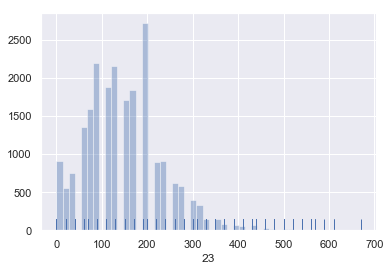

In [59]:
sns.distplot(train_df2['23'][train_df2['23'].notnull()], kde=False, rug=True)
plt.show()

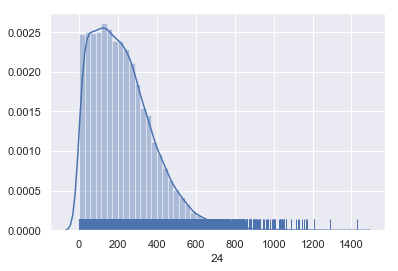

In [60]:
sns.distplot(train_df2['24'][train_df2['24'].notnull()],  rug=True)
plt.show()

# 2. Preproccesing

## Outliers detection

In [61]:
#showgraphs 0- No    1- YES
def handle_outliers(df, showgraphs = 1, drop = 1):
    
    numerical_features_mask = ['0','1', '2','3','4','6','7','8', '9','10','11','12','14','15','16', '17','20','21','23','24']
#     categorical_features_mask = ['2010','2011' ,'13','5_A',   '5_B',   '5_C',   '5_D',   '5_E',   '5_F',   '5_G', '5_H',   '5_I',   '5_J',   '5_K',   '5_L',   '5_M',   '5_N',   '5_O', '5_P',  '18_A',  '18_B',  '18_C',  '18_D',  '18_E',  '18_F',  '18_G', '18_H',  '18_I',  '18_J',  '18_K',  '18_L',  '18_M',  '18_N',  '18_O', '18_P',   '19_A',  '19_B',  '19_C',  '19_D',  '19_E',  '19_F',  '19_G', '19_H',  '19_I',  '19_J',  '19_K',  '19_L',  '19_M',  '19_N',  '19_O','19_P','label']
    
    print('Handling outliers, To drop: {}'.format(bool(drop)))
    scaled_features = df.copy()

    _df = scaled_features[numerical_features_mask]
    scaler = StandardScaler().fit(_df.values)
    _df = scaler.transform(_df.values)
    scaled_features[numerical_features_mask] = _df
    
    for feature in numerical_features_mask:
        
        Q1 = scaled_features[feature][scaled_features[feature].notnull()].quantile(0.25)
        Q3 = scaled_features[feature][scaled_features[feature].notnull()].quantile(0.75)
        IQR = Q3 - Q1
        
        outliers_mask = (scaled_features[feature] < (Q1 - 1.5 * IQR)) | (scaled_features[feature] > (Q3 + 1.5 * IQR))
        
        detected = scaled_features[feature][outliers_mask].shape[0]
        
        if drop:
            scaled_features = scaled_features.drop(scaled_features[feature][outliers_mask].index)
        else:
            scaled_features[feature][outliers_mask] = scaled_features[feature].mean()

            
        if(showgraphs):
            print ('Feature no. {}:    IQR = {}'.format(feature, IQR))
            print ('Outliers detected: {}'.format(detected))
            sns.distplot(scaled_features[feature][scaled_features[feature].notnull()], kde=False, rug=True)
            plt.show()

    return df.loc[scaled_features.index]

### Handling categorical data

In [62]:
#enc_type : 0- One hot encoding   1- Mean encoding (NOT USED!)
def categoricaldata(df,enc_type):
    df[['5','18','19']] = df[['5','18','19']].fillna('nonclassified') 
    if (not enc_type): #One hot encoding
        ca1 = pd.get_dummies(df['5'], prefix = "5")
        ca2 = pd.get_dummies(df['18'], prefix = "18")
        ca3 = pd.get_dummies(df['19'], prefix = "19")

        frames = [df, ca1, ca2, ca3]
        df = pd.concat(frames, axis = 1)

        df = df.drop(columns = ['5', '18', '19', '19_nonclassified', '5_nonclassified', '18_nonclassified'])
        return df
    else: #Mean encoding #Dump idea
        columns = ['5', '18', '19']
        for feature in columns:
            mean_enc = df.groupby([feature])['label'].mean()
            print(mean_enc)
            df.loc[:,'{}_mean_enc'.format(feature)] = df[feature].map(mean_enc)
        df = df.drop(columns = ['5', '18', '19'])
        return df

# categorical_features_mask = ['13', '2010', '2011', '5_mean_enc', '18_mean_enc', '19_mean_enc'] 

### For testing purposes

Feature 6 was handled successfully!
Feature 13 was handled successfully!
Feature 14 was handled successfully!
Feature 22 was handled successfully!
Handling outliers, To drop: True
Feature no. 0:    IQR = 1.347472181904827
Outliers detected: 172


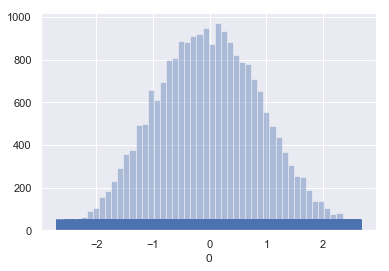

Feature no. 1:    IQR = 1.1893422433758403
Outliers detected: 379


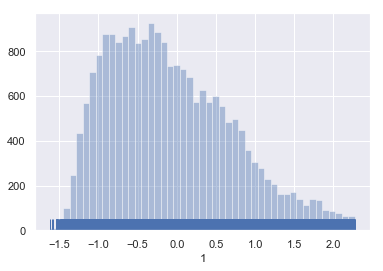

Feature no. 2:    IQR = 1.1756264058323942
Outliers detected: 55


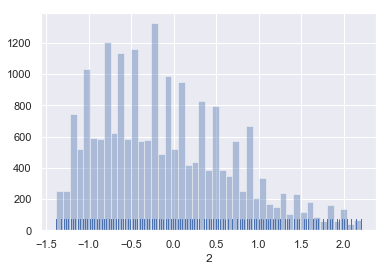

Feature no. 3:    IQR = 1.3377000821518639
Outliers detected: 0


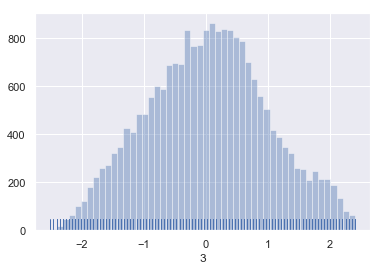

Feature no. 4:    IQR = 1.3164461106993617
Outliers detected: 223


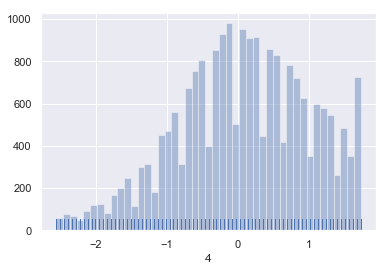

Feature no. 6:    IQR = 1.7701773742841538
Outliers detected: 0


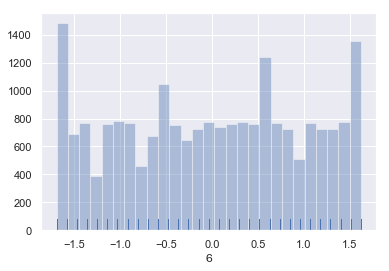

Feature no. 7:    IQR = 1.487275672924045
Outliers detected: 7


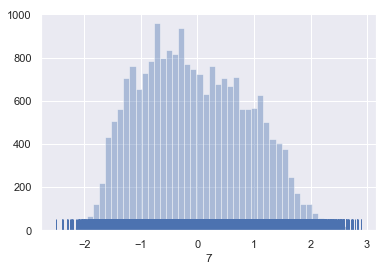

Feature no. 8:    IQR = 1.4862740735736606
Outliers detected: 0


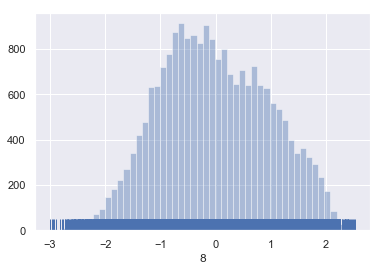

Feature no. 9:    IQR = 1.7744068158290316
Outliers detected: 0


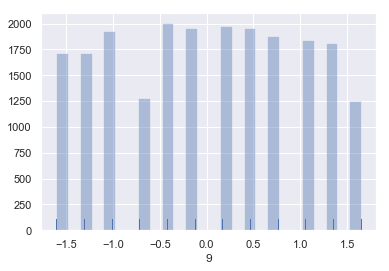

Feature no. 10:    IQR = 0.8853994629868784
Outliers detected: 1117


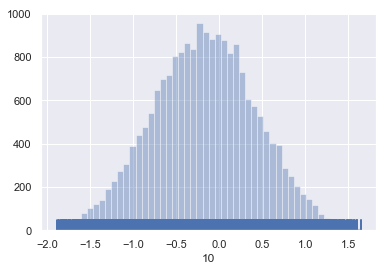

Feature no. 11:    IQR = 1.3263550521293856
Outliers detected: 157


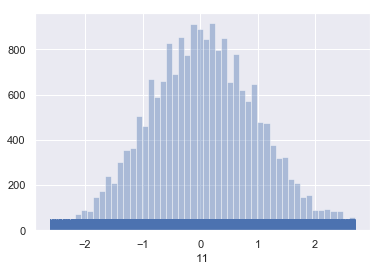

Feature no. 12:    IQR = 1.3125125003445945
Outliers detected: 87


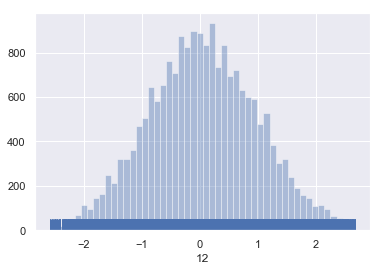

Feature no. 14:    IQR = 0.11196229324483992
Outliers detected: 3595


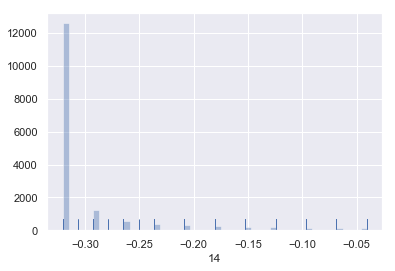

Feature no. 15:    IQR = 1.3204511161007095
Outliers detected: 0


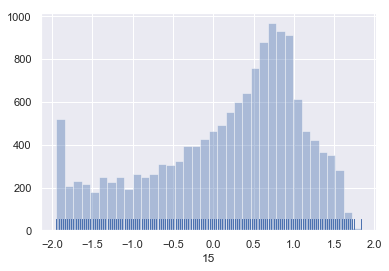

Feature no. 16:    IQR = 1.4236830045422475
Outliers detected: 9


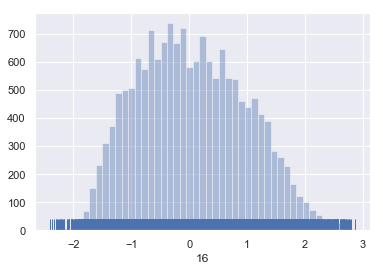

Feature no. 17:    IQR = 1.4978867261044773
Outliers detected: 2


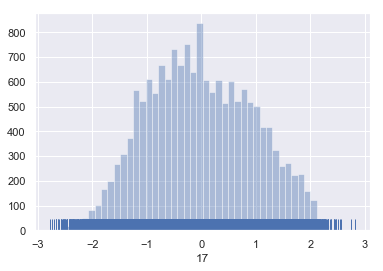

Feature no. 20:    IQR = 1.0645990317704928
Outliers detected: 482


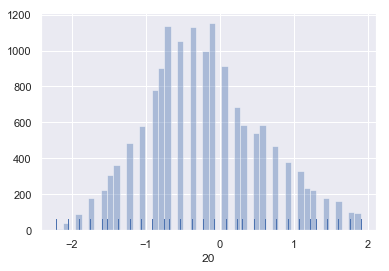

Feature no. 21:    IQR = 1.2870405810095842
Outliers detected: 79


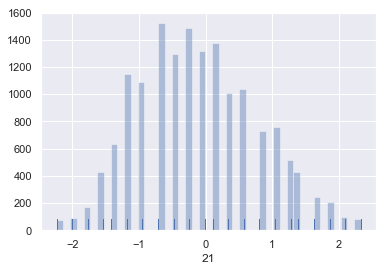

Feature no. 23:    IQR = 1.385557446941442
Outliers detected: 107


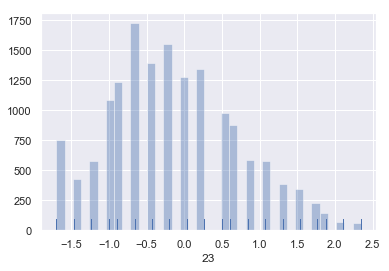

Feature no. 24:    IQR = 1.2636069425831504
Outliers detected: 174


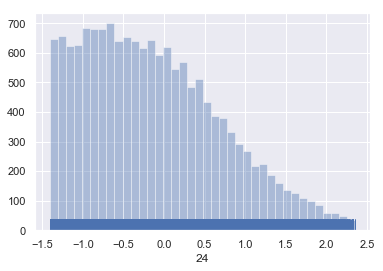

,0,1,2,3,4,6,7,8,9,10,...,19_G,19_H,19_I,19_J,19_K,19_L,19_M,19_N,19_O,19_P
2,0.972794,7.127348,0.4,63.0,100.0,4.0,1.242857,0.428571,6,0.180848,...,0,0,0,0,0,0,0,0,0,0
3,1.891667,17.881507,4.2,65.0,71.0,15.0,1.050000,0.671429,10,0.181289,...,0,0,0,0,0,0,0,0,0,0
4,1.965881,13.936969,3.2,40.0,62.0,1.0,1.950000,1.085714,3,0.237347,...,0,0,0,0,0,0,0,0,0,0
5,2.238301,18.192718,4.8,59.0,56.0,28.0,1.364286,0.657143,11,0.264140,...,0,0,0,0,0,0,0,0,0,0
8,1.809370,15.331249,3.6,37.0,68.0,29.0,1.364286,0.307143,5,0.246409,...,0,0,0,0,0,0,0,0,0,0
9,3.445552,41.997306,12.2,36.0,36.0,26.0,2.364286,1.314286,1,0.280882,...,0,0,0,0,0,0,0,0,0,1
10,1.064046,7.260502,0.6,50.0,52.0,1.0,1.228571,0.650000,8,0.054589,...,0,0,0,0,0,0,0,0,0,0
11,1.691478,10.877962,1.8,45.0,65.0,0.0,1.271429,0.435714,7,0.297668,...,0,0,0,0,1,0,0,0,0,0
12,1.035512,6.897336,0.6,66.0,83.0,22.0,1.050000,0.642857,7,0.229989,...,0,0,0,0,0,0,0,0,0,0
13,2.499729,20.388252,5.4,45.0,64.0,19.0,1.785714,1.128571,6,0.149211,...,0,0,0,0,0,1,0,0,0,0


In [63]:
train_df4 = train_df.copy()
train_df4 = f6_preprocess(train_df4)
train_df4 = f13_preprocess(train_df4)
train_df4 = f14_preprocess(train_df4)
train_df4 = f22_preprocess(train_df4)
train_df4 = categoricaldata(train_df4,0)
train_df4 = handle_outliers(train_df4, 1,drop = 1)
# train_df4 = train_df4.fillna(train_df4.mean())
#features_mask = ['0','1', '2','3','4','6','7','8', '9','10','11','12','14','15','16', '17','20','21','23','24']
#train_df4[features_mask] = standard_or_normal_scaling(train_df4[features_mask], 0)

#train_df4 = standard_or_normal_scaling(train_df4, 0)
#print (train_df4.columns)
#train_df4 = handle_outliers(train_df4, 1,drop = 0)

#train_df4, labels4 = full_preprocessing(train_df4,to_split = 1,to_normalize = 1, train_test =0)

train_df4

In [64]:
train_df4.isnull().sum()

0           0
1           0
2           0
3          37
4          70
6           0
7           5
8          14
9           0
10          0
11         76
12         88
13          0
14         65
15       1340
16         20
17         31
20        921
21         68
23         73
24         73
label       0
2010        0
2011        0
5_A         0
5_B         0
5_C         0
5_D         0
5_E         0
5_F         0
         ... 
18_C        0
18_D        0
18_E        0
18_F        0
18_G        0
18_H        0
18_I        0
18_J        0
18_K        0
18_L        0
18_M        0
18_N        0
18_O        0
18_P        0
19_A        0
19_B        0
19_C        0
19_D        0
19_E        0
19_F        0
19_G        0
19_H        0
19_I        0
19_J        0
19_K        0
19_L        0
19_M        0
19_N        0
19_O        0
19_P        0
Length: 72, dtype: int64

In [65]:
train_df4.columns

Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '20', '21', '23', '24', 'label', '2010', '2011',
       '5_A', '5_B', '5_C', '5_D', '5_E', '5_F', '5_G', '5_H', '5_I', '5_J',
       '5_K', '5_L', '5_M', '5_N', '5_O', '5_P', '18_A', '18_B', '18_C',
       '18_D', '18_E', '18_F', '18_G', '18_H', '18_I', '18_J', '18_K', '18_L',
       '18_M', '18_N', '18_O', '18_P', '19_A', '19_B', '19_C', '19_D', '19_E',
       '19_F', '19_G', '19_H', '19_I', '19_J', '19_K', '19_L', '19_M', '19_N',
       '19_O', '19_P'],
      dtype='object')

In [66]:
train_df4.isnull().sum()

0           0
1           0
2           0
3          37
4          70
6           0
7           5
8          14
9           0
10          0
11         76
12         88
13          0
14         65
15       1340
16         20
17         31
20        921
21         68
23         73
24         73
label       0
2010        0
2011        0
5_A         0
5_B         0
5_C         0
5_D         0
5_E         0
5_F         0
         ... 
18_C        0
18_D        0
18_E        0
18_F        0
18_G        0
18_H        0
18_I        0
18_J        0
18_K        0
18_L        0
18_M        0
18_N        0
18_O        0
18_P        0
19_A        0
19_B        0
19_C        0
19_D        0
19_E        0
19_F        0
19_G        0
19_H        0
19_I        0
19_J        0
19_K        0
19_L        0
19_M        0
19_N        0
19_O        0
19_P        0
Length: 72, dtype: int64

In [67]:
# g = sns.pairplot(train_df4, hue="label", palette="husl")
# g.savefig("pairplot_output.png")

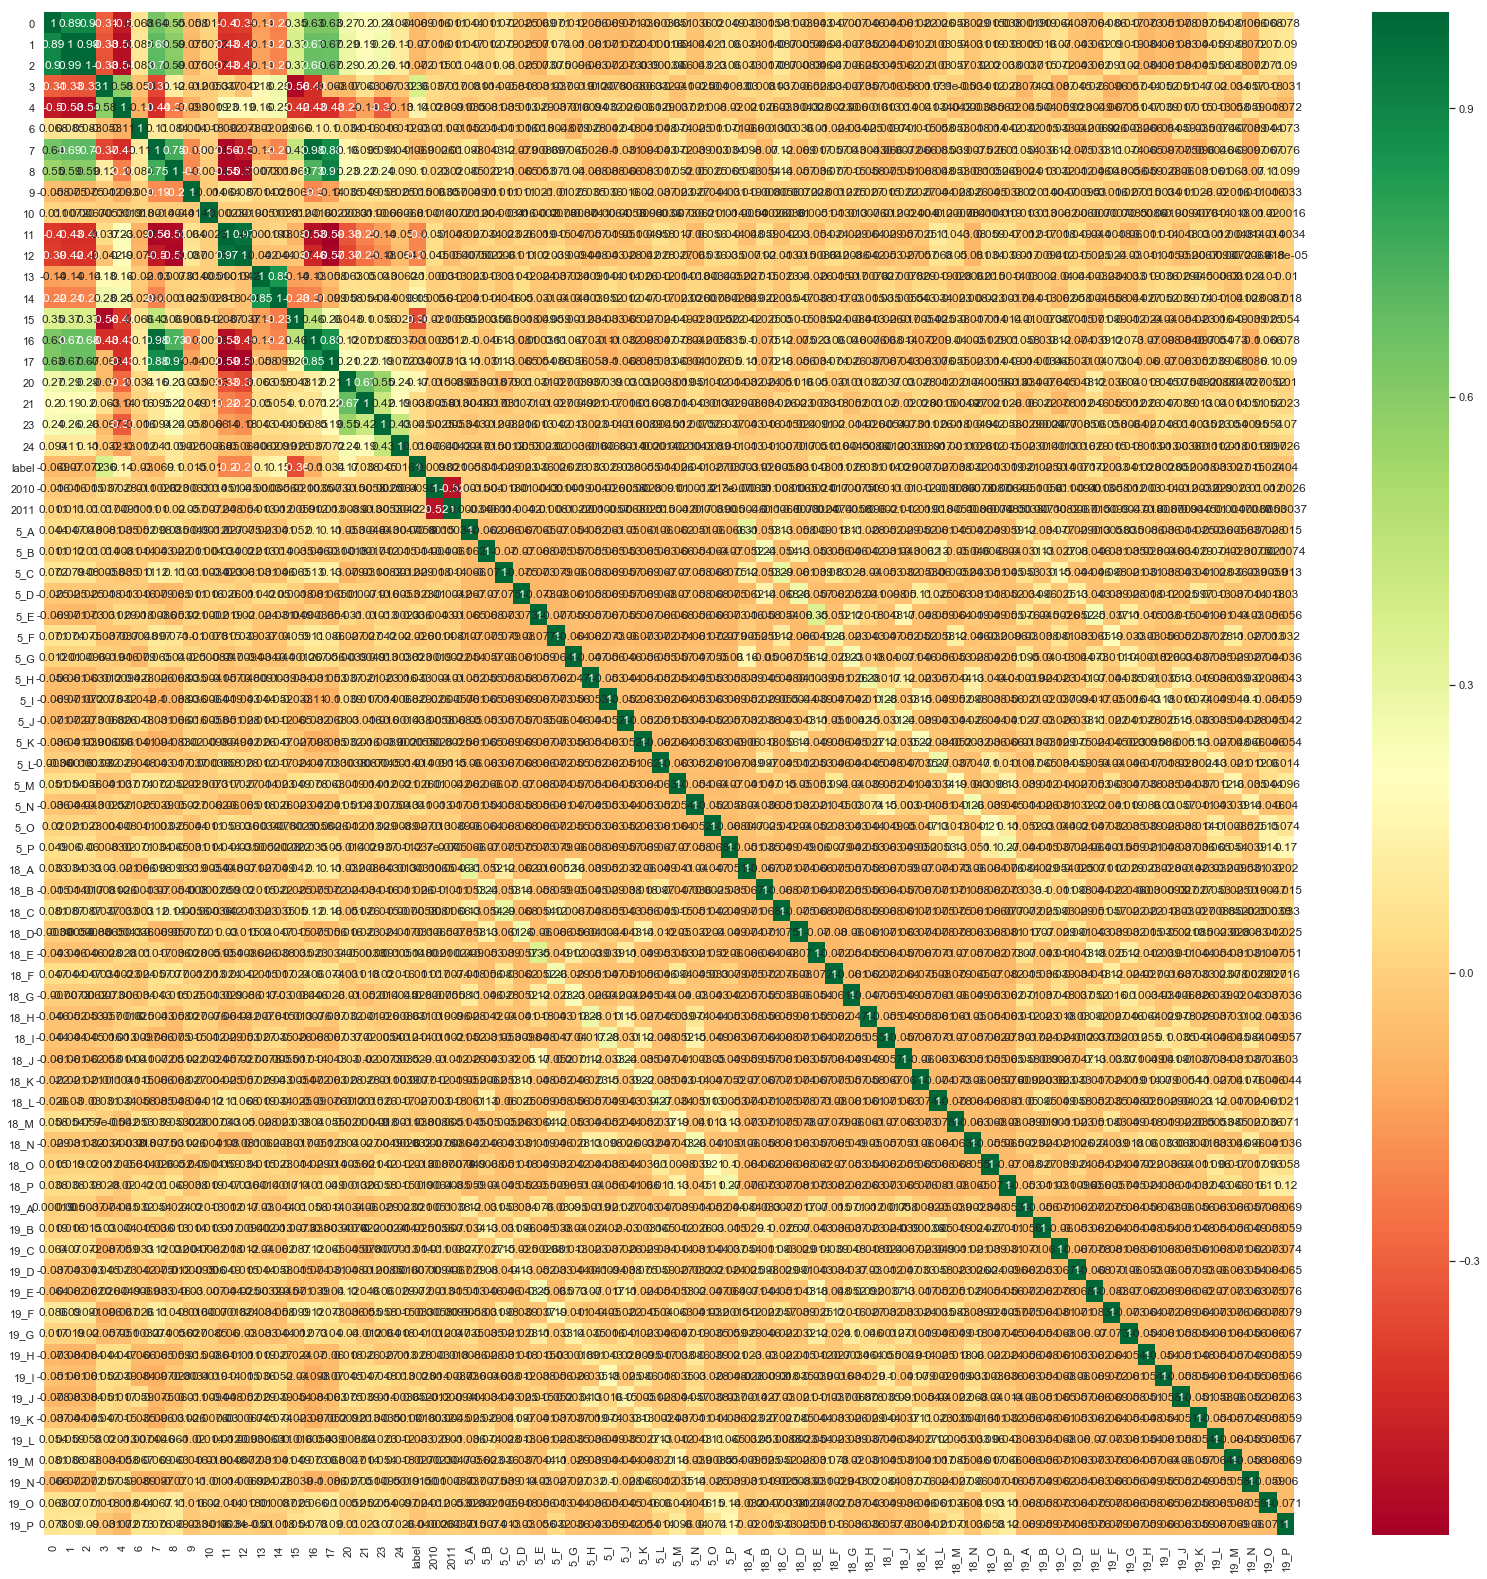

In [68]:
corrmat = train_df4.corr()

#corrmat = corrmat
#print (corrmat)
top_corr_features = corrmat.index
plt.figure(figsize=(28,28))
#plot heat map
g=sns.heatmap(train_df4[top_corr_features].corr(),annot=True,cmap="RdYlGn")
fig = g.get_figure()
fig.savefig("corrmat_output_all.png")

### Feature selection

In [69]:
def Select_k_Best(df,labels, score_func, k):
    categorical_features_mask = [ '2010', '2011','13' ,  '5_A',   '5_B',   '5_C',   '5_D',   '5_E',   '5_F',   '5_G', '5_H',   '5_I',   '5_J',   '5_K',   '5_L',   '5_M',   '5_N',   '5_O',   '18_A',  '18_B',  '18_C',  '18_D',  '18_E',  '18_F',  '18_G', '18_H',  '18_I',  '18_J',  '18_K',  '18_L',  '18_M',  '18_N',  '18_O',   '19_A',  '19_B',  '19_C',  '19_D',  '19_E',  '19_F',  '19_G', '19_H',  '19_I',  '19_J',  '19_K',  '19_L',  '19_M',  '19_N',  '19_O','5_P','18_P', '19_P' ] #'2012','5_P','18_P', , '19_P' 
    
    bestfeatures = SelectKBest(score_func=score_func, k=k)
    fit = bestfeatures.fit(df,labels)

    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(df.columns)

    featureScores = pd.concat([dfcolumns,dfscores],axis=1) #.reset_index(drop =1)
    featureScores.columns = ['Feature','Score']
    
    if score_func == chi2:
        print('chi^2 on categorical features')
        X_indices = np.array(categorical_features_mask)
        scores = -np.log10(bestfeatures.pvalues_)
        scores /= scores.max()
        
        plt.figure(figsize=(24,10))
        plt.bar(categorical_features_mask , scores, width=1.4,
                label=r'Univariate score ($-Log(p_{value})$)')
        plt.show()
    
    #print(featureScores.nlargest(k,'Score')['Feature'].reset_index(drop=True))
    return featureScores.nlargest(k,'Score')['Feature'].reset_index(drop=True)

In [70]:
# corrmat = train_bk_df.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(train_bk_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# fig = g.get_figure()
# fig.savefig("corrmat_output.png")

## Standardization & Normlization

In [71]:
# scale_type: 0- Standardization    1- Normlization
def standard_or_normal_scaling(df, scale_type = 0): 
    if(not scale_type):
        scaler = StandardScaler()
        scaler.fit(df)
        df_standardized = pd.DataFrame(data=scaler.transform(df)) 
        print(df.shape)
        return df_standardized
    else:
        scaler = MinMaxScaler()
        scaler.fit(df)
        df_Normlized = pd.DataFrame(data=scaler.transform(df)) 
        print(df.shape)
        return df_Normlized
        

## Dimentionality reduction

In [72]:
def do_PCA(X_standardized, n ):
    pca = PCA(n_components= n)
    pca.fit(X_standardized )
   
    while pca.explained_variance_ratio_.sum() < 0.9499:
        n+=1
        pca = PCA(n_components= n)
        pca.fit(X_standardized)
    print (n)
    X_standardized_reduced = pd.DataFrame(data = pca.transform(X_standardized))
    
    return X_standardized_reduced

In [73]:
#method: 0- Feature Selecting    1- PCA   
# score_func: f_classif    chi2
# k: Tuple (k_numerical, k_categorical)
def dimentionality_reduction(df,labels, method, k):
    
    numerical_features_mask = ['0','1', '2','3','4','6','7','8', '9','10','11','12','14','15','16', '17','20','21','23','24']
    categorical_features_mask = ['2010','2011' ,'13','5_A',   '5_B',   '5_C',   '5_D',   '5_E',   '5_F',   '5_G', '5_H',   '5_I',   '5_J',   '5_K',   '5_L',   '5_M',   '5_N',   '5_O', '5_P',  '18_A',  '18_B',  '18_C',  '18_D',  '18_E',  '18_F',  '18_G', '18_H',  '18_I',  '18_J',  '18_K',  '18_L',  '18_M',  '18_N',  '18_O', '18_P',   '19_A',  '19_B',  '19_C',  '19_D',  '19_E',  '19_F',  '19_G', '19_H',  '19_I',  '19_J',  '19_K',  '19_L',  '19_M',  '19_N',  '19_O','19_P']
    
#     df_numerical_reduced =  Numerical_PCA(df[numerical_features_mask])
#     df_categorical_reduced =  Numerical_PCA(df[categorical_features_mask])
    
#     print (df_numerical_reduced, df_categorical_reduced, labels.shape)
    if not method:
        #_df = standard_or_normal_scaling(df, scale_type = 1)
        scaled_features = df.copy()

        _df = scaled_features[numerical_features_mask]
        scaler = MinMaxScaler().fit(_df.values)
        _df = scaler.transform(_df.values)
        scaled_features[numerical_features_mask] = _df
        
#         print ('scaled_features\n', scaled_features)
            
        bestk_numerical_features = Select_k_Best(scaled_features[numerical_features_mask] ,labels, f_classif, k[0])
        bestk_categorical_features = Select_k_Best(scaled_features[categorical_features_mask] ,labels, chi2, k[1])
        
        bestkfeatures = np.append(bestk_numerical_features, bestk_categorical_features)
        print ('bestkfeatures\n', bestkfeatures, bestkfeatures.shape[0])
#         df_numerical_reduced =  Numerical_PCA(df[bestk_numerical_features])
#         df_categorical_reduced =  Numerical_PCA(df[bestk_categorical_features])

        df[bestk_numerical_features] = df[bestk_numerical_features].loc[scaled_features[bestk_numerical_features].index]
#         df[categorical_features_mask] = df[categorical_features_mask].loc[scaled_features[categorical_features_mask].index]
        
        df_numerical_reduced =  df[bestk_numerical_features]
        df_categorical_reduced = df[bestk_categorical_features]
#         print (df)
#         print ('df_numerical_reduced\n', df_numerical_reduced)
#         print ('df_categorical_reduced\n', df_categorical_reduced)
        
#         print (pd.concat([df_numerical_reduced, df_categorical_reduced], axis = 1))
        #print (bestkfeatures)
        return pd.concat([df_numerical_reduced, df_categorical_reduced], axis = 1), bestkfeatures
#         return df, bestkfeatures
        
    
    else: # PCA NOT USED
        numeric_features_mask = ['0','1', '2','3','4','6','7','8', '9','10','11','12','14','15','16', '17','20','21','23','24'] #,'14'
        categorical_features_mask = ['13', '2010', '2011',    '5_A',   '5_B',   '5_C',   '5_D',   '5_E',   '5_F',   '5_G', '5_H',   '5_I',   '5_J',   '5_K',   '5_L',   '5_M',   '5_N',   '5_O',   '18_A',  '18_B',  '18_C',  '18_D',  '18_E',  '18_F',  '18_G', '18_H',  '18_I',  '18_J',  '18_K',  '18_L',  '18_M',  '18_N',  '18_O',   '19_A',  '19_B',  '19_C',  '19_D',  '19_E',  '19_F',  '19_G', '19_H',  '19_I',  '19_J',  '19_K',  '19_L',  '19_M',  '19_N',  '19_O'] #'2012','5_P','18_P', , '19_P' 

        X_numerical = pd.DataFrame(data=df[numeric_features_mask])
        X_numerical_standardized = standard_scaling(X_numerical)
        X_numerical_standardized_reduced = Numerical_PCA(X_numerical_standardized) 
        
        X_categorical = pd.DataFrame(data=df[categorical_features_mask])
        X_categorical_standardized = standard_scaling(X_categorical)
        X_categorical_standardized_reduced = categorical_PCA(X_categorical_standardized)
        
        frames = [X_numerical_standardized_reduced, X_categorical_standardized_reduced, labels]
        return pd.concat(frames, axis = 1)


### Clustering

In [74]:
def Kmeans(X, n_clusters, train_test):
#     n_clusters = len(np.unique(y_train))
    kmclf = KMeans(n_clusters = n_clusters, random_state=52)
    kmclf.fit(X)
    if not train_test:
        y_labels_train = kmclf.labels_
        X_km_clust = y_labels_train
    else:
        y_labels_test = kmclf.predict(X)
        X_km_clust = y_labels_test
    return X_km_clust

In [75]:
def gmm_clustering(X, n):
    gmm = GaussianMixture(n_components=n)
    gmm.fit(X)
    #predictions from gmm
    return gmm.predict(X)

## Integrating

In [76]:
def full_preprocessing(df, to_split = 1, to_normalize = 1, to_reduce_dim_method = 0, train_test=0):
    
    categorical_features_mask = ['5_A',   '5_B',   '5_C',   '5_D',   '5_E',   '5_F',   '5_G', '5_H',   '5_I',   '5_J',   '5_K',   '5_L',   '5_M',   '5_N',   '5_O', '5_P',  '18_A',  '18_B',  '18_C',  '18_D',  '18_E',  '18_F',  '18_G', '18_H',  '18_I',  '18_J',  '18_K',  '18_L',  '18_M',  '18_N',  '18_O', '18_P',   '19_A',  '19_B',  '19_C',  '19_D',  '19_E',  '19_F',  '19_G', '19_H',  '19_I',  '19_J',  '19_K',  '19_L',  '19_M',  '19_N',  '19_O','19_P']
    numerical_features_mask = ['0','1', '2','3','4','7','8','10','11','12','15','16', '17','20','21','23','24']
#'6', '9', '14',
    df = f6_preprocess(df)
    df = f13_preprocess(df)
    df = f14_preprocess(df)
    df = f22_preprocess(df)
    df = categoricaldata(df,0)

    
    if not train_test:
        
        df = handle_outliers(df, 1, drop = 1)
        labels = df.label
        df = df.drop(columns = ['label'])
        
#         scaler = StandardScaler().fit(df.values)
#         df = pd.DataFrame(data=scaler.transform(df.values))
        
        df = df.fillna(df.mean())
        
        #clustering for categorical data
        categorical_km_clust = Kmeans(df[categorical_features_mask], n_clusters = 2, train_test = train_test)
        
        global bestk
        reduced_df, bestk = dimentionality_reduction(df,labels, method =0 ,k = (13, 17))
        
#         reduced_df['categorical_km_clust'] = categorical_km_clust
        reduced_df['gmm_clust'] = gmm_clustering(df[numerical_features_mask], n=2)
        df = standard_or_normal_scaling(reduced_df, scale_type = 0)
#         print (df)
        
        
        if (to_split):
            return df, labels
        else:
            return pd.concat([df, labels], axis = 1)
        
    else: # test
        to_split =0
#         df = df.drop(columns =['Unnamed: 0'] )
        df = handle_outliers(df, 1, drop = 0)

        
        
        #clustering for categorical data
        categorical_km_clust = Kmeans(df[categorical_features_mask], n_clusters = 2, train_test = train_test)
        
        df = df[bestk]
        print (bestk)
#         df['categorical_km_clust'] = categorical_km_clust

        scaler = StandardScaler().fit(df.values)
        df = pd.DataFrame(data=scaler.transform(df.values))
        
        df = df.fillna(df.mean())
        
        df['gmm_clust'] = gmm_clustering(df, n=2)
        scaler = StandardScaler().fit(df.values)
        df = pd.DataFrame(data=scaler.transform(df.values))
        
        
        return df
 

## Ready to use data

Feature 6 was handled successfully!
Feature 13 was handled successfully!
Feature 14 was handled successfully!
Feature 22 was handled successfully!
Handling outliers, To drop: True
Feature no. 0:    IQR = 1.347472181904827
Outliers detected: 172


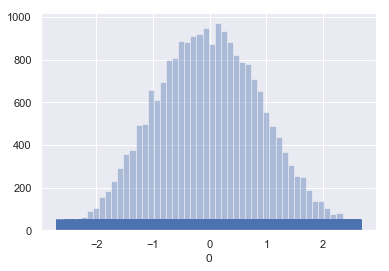

Feature no. 1:    IQR = 1.1893422433758403
Outliers detected: 379


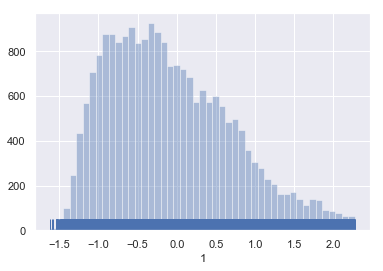

Feature no. 2:    IQR = 1.1756264058323942
Outliers detected: 55


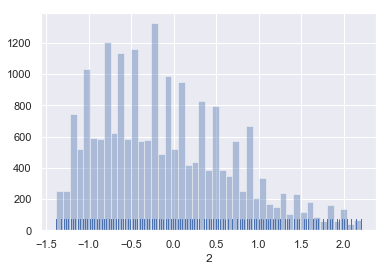

Feature no. 3:    IQR = 1.3377000821518639
Outliers detected: 0


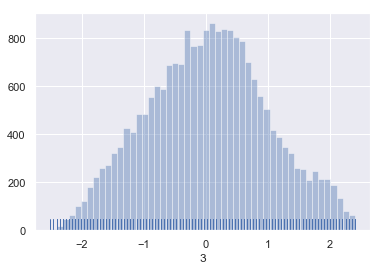

Feature no. 4:    IQR = 1.3164461106993617
Outliers detected: 223


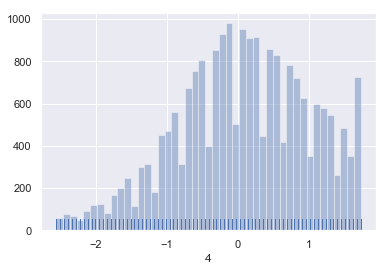

Feature no. 6:    IQR = 1.7701773742841538
Outliers detected: 0


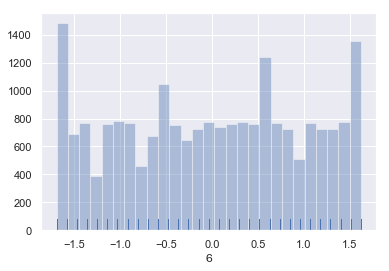

Feature no. 7:    IQR = 1.487275672924045
Outliers detected: 7


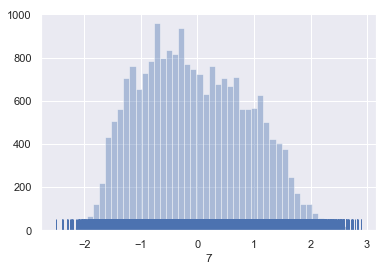

Feature no. 8:    IQR = 1.4862740735736606
Outliers detected: 0


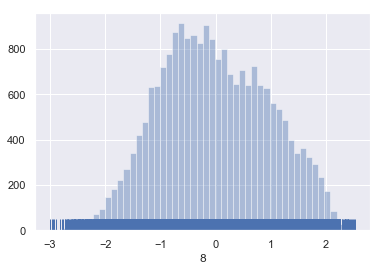

Feature no. 9:    IQR = 1.7744068158290316
Outliers detected: 0


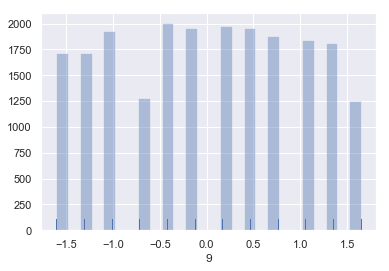

Feature no. 10:    IQR = 0.8853994629868784
Outliers detected: 1117


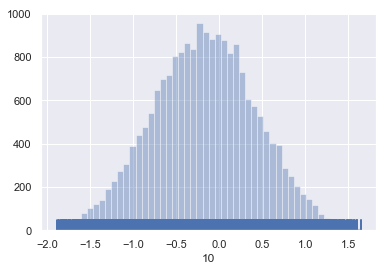

Feature no. 11:    IQR = 1.3263550521293856
Outliers detected: 157


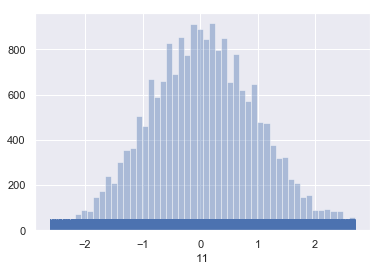

Feature no. 12:    IQR = 1.3125125003445945
Outliers detected: 87


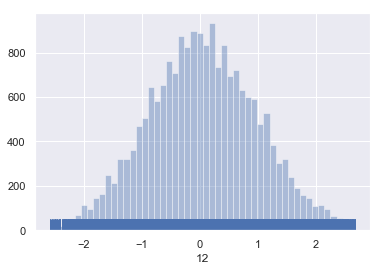

Feature no. 14:    IQR = 0.11196229324483992
Outliers detected: 3595


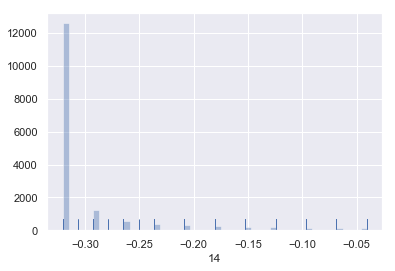

Feature no. 15:    IQR = 1.3204511161007095
Outliers detected: 0


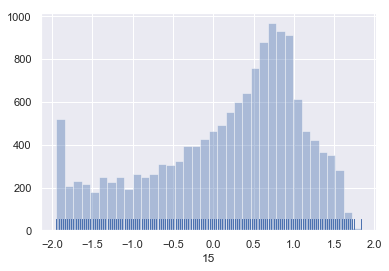

Feature no. 16:    IQR = 1.4236830045422475
Outliers detected: 9


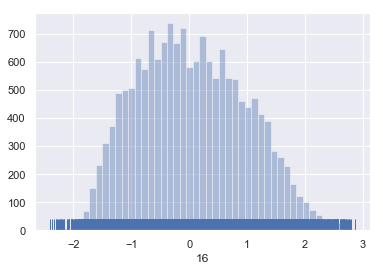

Feature no. 17:    IQR = 1.4978867261044773
Outliers detected: 2


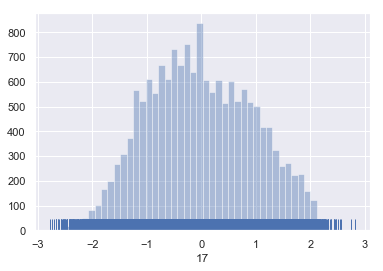

Feature no. 20:    IQR = 1.0645990317704928
Outliers detected: 482


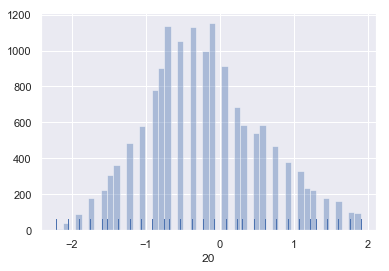

Feature no. 21:    IQR = 1.2870405810095842
Outliers detected: 79


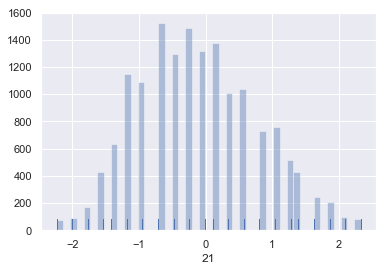

Feature no. 23:    IQR = 1.385557446941442
Outliers detected: 107


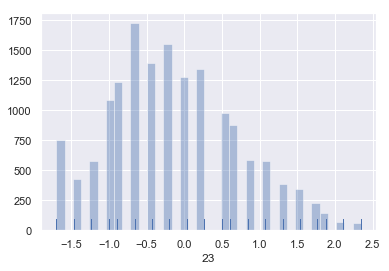

Feature no. 24:    IQR = 1.2636069425831504
Outliers detected: 174


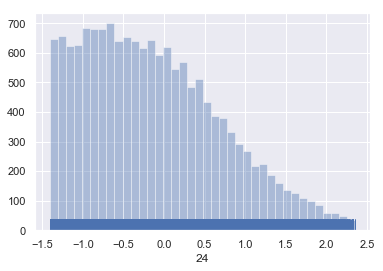

chi^2 on categorical features


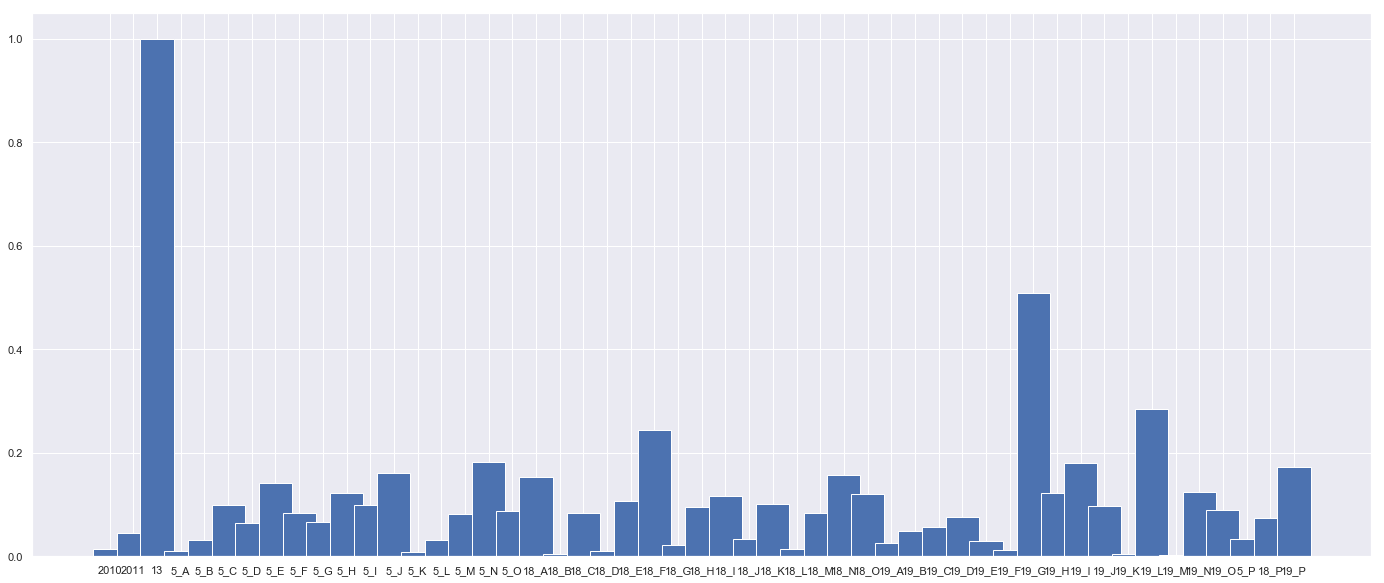

bestkfeatures
 ['3' '15' '12' '11' '20' '14' '4' '16' '8' '2' '1' '0' '7' '13' '19_E'
 '19_J' '18_E' '5_N' '19_G' '19_P' '5_J' '18_M' '5_P' '5_E' '19_L' '5_H'
 '19_F' '18_N' '18_H' '18_D'] 30
(15516, 31)


/Users/zahere/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zahere/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.791843,0.000000,1.178685,0.695472,-2.197716,-0.405460,2.004237,-0.877432,-0.901576,-1.589845,...,3.597319,-0.273383,-0.265958,-0.247120,-0.212769,-0.293555,-0.226946,-0.218983,-0.27973,-0.658393
1,0.902151,0.239679,0.126049,0.868179,0.208944,1.621726,0.241388,-1.249439,-0.377264,-0.208159,...,-0.277985,-0.273383,-0.265958,-0.247120,-0.212769,-0.293555,-0.226946,-0.218983,-0.27973,1.518850
2,-0.476689,0.944605,-1.759268,-1.738125,-0.693553,-0.405460,-0.305703,0.756167,0.517149,-0.571761,...,-0.277985,-0.273383,-0.265958,-0.247120,-0.212769,-0.293555,-0.226946,-0.218983,-0.27973,-0.658393
3,0.571229,0.063447,0.110338,0.208752,0.008389,-0.405460,-0.670430,-0.715689,-0.408106,0.010002,...,-0.277985,-0.273383,-0.265958,-0.247120,-0.212769,-0.293555,-0.226946,-0.218983,-0.27973,-0.658393
4,-0.642149,0.562770,0.534535,0.381459,0.610054,-0.405460,0.059025,-0.553947,-1.163732,-0.426320,...,-0.277985,-0.273383,-0.265958,-0.247120,-0.212769,-0.293555,-0.226946,-0.218983,-0.27973,-0.658393
5,-0.697303,1.532044,-1.900667,-1.581119,1.311996,-0.405460,-1.886188,1.322265,1.010619,2.700653,...,-0.277985,-0.273383,-0.265958,-0.247120,-0.212769,-0.293555,-0.226946,-0.218983,-0.27973,1.518850
6,0.074847,-2.080704,-0.879453,-0.811788,-0.593276,0.608133,-0.913582,-0.780386,-0.423527,-1.517125,...,-0.277985,-0.273383,-0.265958,-0.247120,-0.212769,-0.293555,-0.226946,-0.218983,-0.27973,1.518850
7,-0.200921,0.000000,0.267448,0.318657,0.008389,-0.405460,-0.123339,-0.974477,-0.886155,-1.080803,...,-0.277985,-0.273383,-0.265958,-0.247120,-0.212769,-0.293555,-0.226946,-0.218983,-0.27973,-0.658393
8,0.957304,-1.728241,-1.633580,-1.596820,-0.392721,-0.405460,0.970843,-1.362659,-0.438948,-1.517125,...,-0.277985,-0.273383,3.759995,-0.247120,-0.212769,-0.293555,-0.226946,-0.218983,-0.27973,1.518850
9,-0.200921,0.768374,-0.015349,-0.011057,0.409499,-0.405460,-0.184127,0.206242,0.609675,0.228163,...,-0.277985,3.657866,-0.265958,4.046621,-0.212769,-0.293555,-0.226946,-0.218983,-0.27973,-0.658393


In [77]:
train_df_copy = train_df.copy()

X ,labels = full_preprocessing(train_df_copy, to_split = 1, to_normalize = 0, to_reduce_dim_method = 0)
X.head(10)
# print (X, labels)

In [78]:
X.columns

RangeIndex(start=0, stop=31, step=1)

In [79]:
bestk

array(['3', '15', '12', '11', '20', '14', '4', '16', '8', '2', '1', '0',
       '7', '13', '19_E', '19_J', '18_E', '5_N', '19_G', '19_P', '5_J',
       '18_M', '5_P', '5_E', '19_L', '5_H', '19_F', '18_N', '18_H',
       '18_D'], dtype=object)

## Preprocrssing Test data

In [80]:
Test_df = pd.read_csv('test_without_target.csv', index_col=0) #For removing Unnamed: 0 column
Test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.534361,12.002415,2.6,67.0,97.0,F,a11,1.600000,0.650000,3,...,105.0,21.5,12.2,F,H,52.0,33.0,2012,70.0,354.720533
1,1.632953,14.821694,3.6,72.0,78.0,M,a18,1.942857,1.328571,4,...,34.0,25.0,24.3,P,D,24.0,11.0,2012,40.0,120.529466
2,2.330694,21.399766,5.4,64.0,53.0,A,a20,1.864286,0.992857,8,...,102.0,23.7,22.8,C,O,39.0,31.0,2011,70.0,294.533370
3,2.560304,21.744331,5.8,20.0,71.0,N,a18,2.457143,1.257143,11,...,124.0,33.7,26.0,N,I,35.0,13.0,2012,60.0,57.037532
4,1.391859,18.158369,4.8,44.0,42.0,F,a3,1.285714,0.892857,9,...,84.0,16.1,15.4,M,M,43.0,20.0,2012,200.0,178.457573


Feature 6 was handled successfully!
Feature 13 was handled successfully!
Feature 14 was handled successfully!
Feature 22 was handled successfully!
Handling outliers, To drop: False
Feature no. 0:    IQR = 1.333862147259056
Outliers detected: 77


/Users/zahere/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


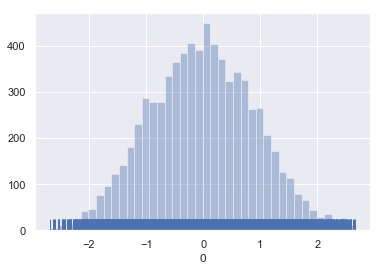

Feature no. 1:    IQR = 1.1605176513760278
Outliers detected: 180


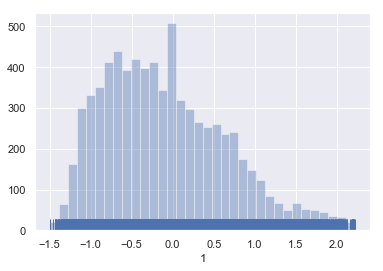

Feature no. 2:    IQR = 1.1333204389757818
Outliers detected: 200


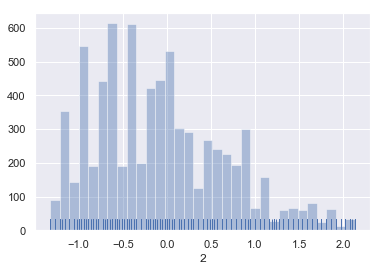

Feature no. 3:    IQR = 1.3897028849184476
Outliers detected: 0


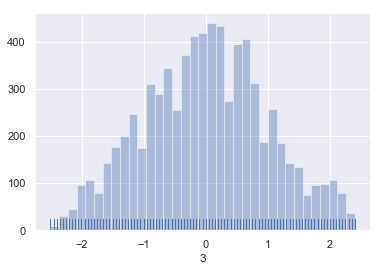

Feature no. 4:    IQR = 1.342232626554741
Outliers detected: 90


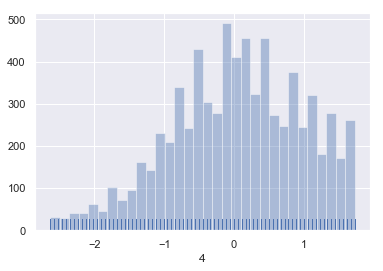

Feature no. 6:    IQR = 1.7814824733707058
Outliers detected: 0


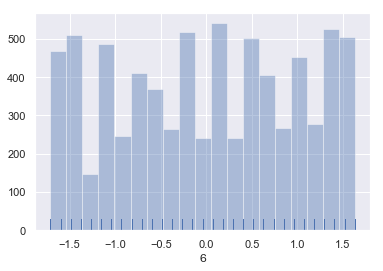

Feature no. 7:    IQR = 1.5529461907899091
Outliers detected: 1


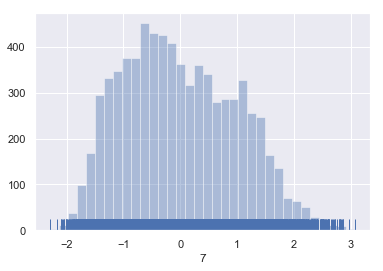

Feature no. 8:    IQR = 1.4935236056838
Outliers detected: 1


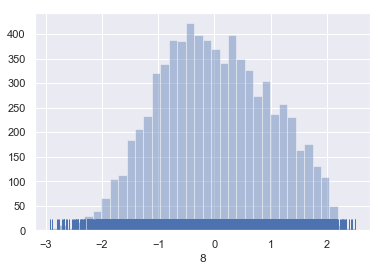

Feature no. 9:    IQR = 1.7640631792342418
Outliers detected: 0


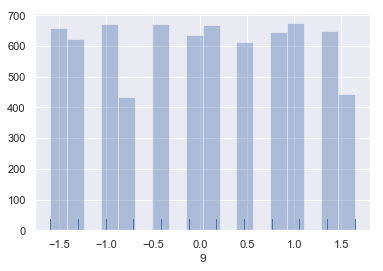

Feature no. 10:    IQR = 0.9114757182048172
Outliers detected: 374


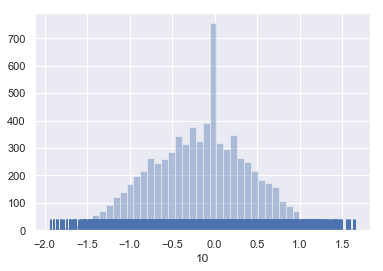

Feature no. 11:    IQR = 1.3874666487039526
Outliers detected: 47


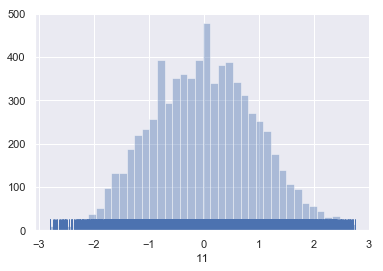

Feature no. 12:    IQR = 1.3653952665090885
Outliers detected: 49


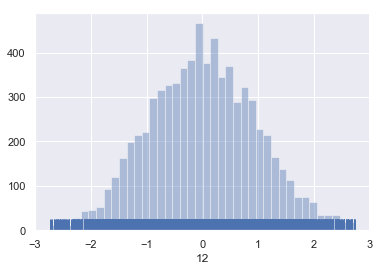

Feature no. 14:    IQR = 0.1286999318431254
Outliers detected: 1305


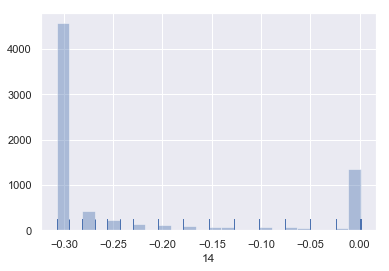

Feature no. 15:    IQR = 1.574862930536682
Outliers detected: 0


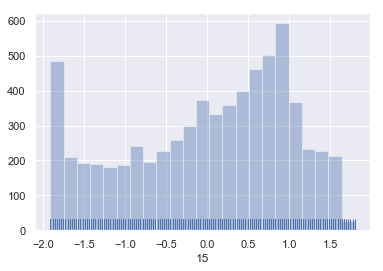

Feature no. 16:    IQR = 1.508926609756532
Outliers detected: 3


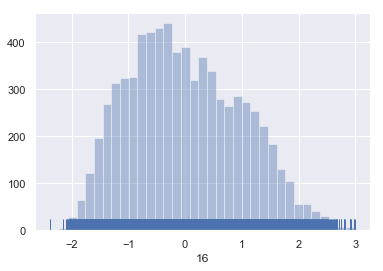

Feature no. 17:    IQR = 1.5307566523340672
Outliers detected: 0


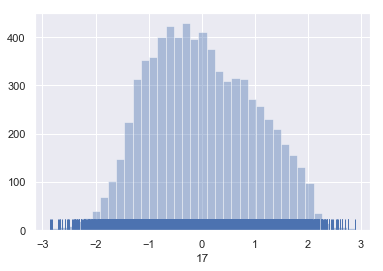

Feature no. 20:    IQR = 1.3104886533947102
Outliers detected: 121


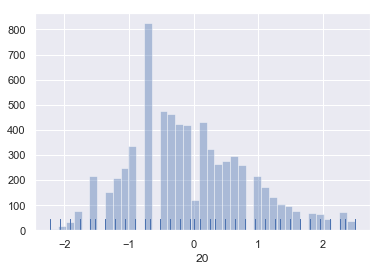

Feature no. 21:    IQR = 1.3111358543510019
Outliers detected: 96


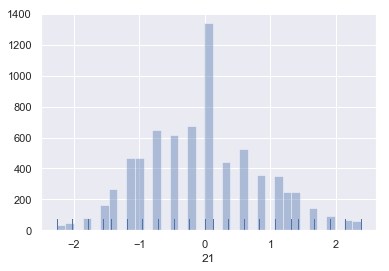

Feature no. 23:    IQR = 1.2836670258605292
Outliers detected: 115


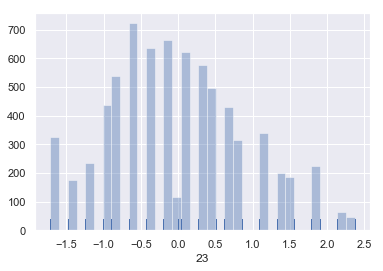

Feature no. 24:    IQR = 1.37151335932221
Outliers detected: 116


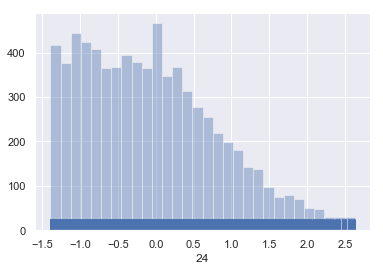

['3' '15' '12' '11' '20' '14' '4' '16' '8' '2' '1' '0' '7' '13' '19_E'
 '19_J' '18_E' '5_N' '19_G' '19_P' '5_J' '18_M' '5_P' '5_E' '19_L' '5_H'
 '19_F' '18_N' '18_H' '18_D']


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.752874,8.705081e-01,1.204114e+00,9.600398e-01,9.763303e-01,-0.282408,1.567161,-0.010936,-0.521152,-0.619773,...,-0.269156,-0.265668,-0.272037,-0.247074,-0.204311,-0.285018,-0.239584,-0.216930,-0.283906,-0.623115
1,1.003696,-1.069505e+00,-2.077773e-01,-3.165442e-01,-1.246709e+00,-0.282408,0.502252,0.523029,0.957315,-0.349935,...,-0.269156,-0.265668,-0.272037,-0.247074,-0.204311,-0.285018,-0.239584,-0.216930,-0.283906,-0.623115
2,0.602381,7.885357e-01,4.197301e-01,2.572014e-01,-5.579486e-02,-0.308206,-0.898946,0.324700,0.225863,0.135774,...,-0.269156,-0.265668,-0.272037,-0.247074,-0.204311,-0.285018,-0.239584,-0.216930,-0.283906,-0.623115
3,-1.604850,1.389667e+00,-9.065924e-01,-1.205850e+00,-3.733718e-01,1.833001,0.109916,1.850314,0.801687,0.243709,...,-0.269156,-0.265668,-0.272037,-0.247074,-0.204311,-0.285018,4.173901,-0.216930,-0.283906,-0.623115
4,-0.400906,2.967013e-01,8.190530e-01,7.592289e-01,2.617821e-01,-0.308206,-1.515472,-0.834768,0.007984,-0.026129,...,3.715321,-0.265668,-0.272037,-0.247074,-0.204311,-0.285018,-0.239584,-0.216930,-0.283906,1.604839
5,-1.354028,7.885357e-01,1.346730e+00,1.261256e+00,4.999648e-01,-0.308206,-2.019903,-0.788999,-2.092995,-0.026129,...,-0.269156,-0.265668,-0.272037,-0.247074,-0.204311,-0.285018,-0.239584,-0.216930,-0.283906,-0.623115
6,-0.300577,-1.131607e-01,3.466870e-02,5.297306e-01,8.175418e-01,-0.308206,1.174826,-0.773743,-0.567840,-0.511838,...,-0.269156,-0.265668,-0.272037,-0.247074,-0.204311,-0.285018,-0.239584,-0.216930,-0.283906,-0.623115
7,-1.153371,1.007129e+00,9.046222e-01,6.157925e-01,-5.321603e-01,-0.308206,-0.674754,0.355212,-0.770156,-0.080097,...,-0.269156,3.764091,-0.272037,-0.247074,-0.204311,-0.285018,-0.239584,-0.216930,-0.283906,1.604839
8,0.301395,-2.497814e-01,4.054685e-01,3.576069e-01,-4.142677e-17,-0.308206,0.782491,-0.483876,-0.116519,-0.997547,...,-0.269156,-0.265668,-0.272037,-0.247074,-0.204311,-0.285018,-0.239584,-0.216930,-0.283906,-0.623115
9,-1.404193,2.420530e-01,-2.648235e-01,-1.444205e-01,2.617821e-01,-0.308206,0.950635,1.224812,-0.287710,-0.349935,...,-0.269156,-0.265668,-0.272037,-0.247074,-0.204311,-0.285018,4.173901,-0.216930,-0.283906,-0.623115


In [81]:
Test_df_copy = Test_df.copy()

X_Test_df = full_preprocessing(Test_df_copy, to_split = 0, to_normalize = 1, to_reduce_dim_method = 0, train_test=1)
X_Test_df

# 3. Classifiers

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=.33, shuffle=1,random_state=RS)

In [83]:
classifiers = []

In [84]:
def build_clf_report(clf, X_train, y_train, X_test, y_test):
    y_pred = clf.predict(X_train)
    y_proba = clf.predict_proba(X_test)[:, 1]

    print('Results on the test set:')
    auc_ = roc_auc_score(y_test, y_proba)
    print('AUC: {}'.format(auc_))
    acc_ = cross_val_score(clf, X, labels, cv=10).mean()
    print('Accuracy: {}'.format(acc_))
    print(classification_report(y_train, y_pred))
    return auc_, acc_ 

## Logistic Regression Model

In [85]:
parametersOptions = {'penalty' : ['l1', 'l2'], 
                         'C' : np.logspace(-4, 4, 20), 
                         'solver': ['liblinear','saga'],
                         'tol' : [0.0001], 
                         'max_iter' : [100,500,1000,1500]}

GS = GridSearchCV(LogisticRegression(), parametersOptions, cv=10, scoring='roc_auc',verbose=True, n_jobs=-1)
#GS.fit(train_data, train_labels)
GS.fit(X, labels.values.ravel())
print (' chosen parameters (recieved best AUC): {}'.format(GS.best_params_))
print (" AUC score with the chosen parameters: ", GS.best_score_)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 765 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 1465 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 1923 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2473 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3123 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:  3.2min finished


 chosen parameters (recieved best AUC): {'C': 0.615848211066026, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}
 AUC score with the chosen parameters:  0.8622556495274446


In [86]:
logclf2 = LogisticRegression(**GS.best_params_, random_state = RS)

logclf2.fit(X_train, y_train.values.ravel())
logclf2.score(X_test, y_test)

0.8857644991212654

In [87]:
# logclf2.score(X_train, y_train) # For OVERFITTING

In [88]:
logclf = LogisticRegression(# ---The regularization hyperparameters---
                         penalty="l2", # As shown above - l1 stands for abs distance, l2 stands for quad_distances
                         C=0.01, # # Inverse regularization parameter, larger C means less regularization.
                         solver='liblinear', # Algorithm to use in the optimization problem
                         # ---The Optimization parameters---
                         tol=0.0001, # Stopping critiria
                         max_iter=100) # For some optimization algorithms, the algorithm solves it with iterations.

logclf.fit(X_train, y_train.values.ravel())
# logclf.score(X_test, y_test)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
logclf3 = LogisticRegression(C= 1.623776739188721, max_iter= 1000, penalty= 'l2', solver= 'saga', tol = 0.0001, random_state = RS)

logclf3.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=52,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [90]:
auc_, acc_  = build_clf_report(logclf3, X_train, y_train, X_test, y_test)

Results on the test set:
AUC: 0.8596962559577671
Accuracy: 0.8853427932610284
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      8929
           1       0.70      0.36      0.47      1466

   micro avg       0.89      0.89      0.89     10395
   macro avg       0.80      0.67      0.71     10395
weighted avg       0.87      0.89      0.87     10395



In [91]:
classifiers.append(('Logistic Regression', logclf3, auc_, acc_  ))

## KNN Model

In [92]:
# k_range = list(range(1,40))
# weight_options = ["uniform", "distance"]

# param_grid = dict(n_neighbors = k_range, weights = weight_options)
# #print (param_grid)
# knn = neighbors.KNeighborsClassifier()

# grid = GridSearchCV(knn, param_grid, cv = 3, scoring='roc_auc',verbose=True, n_jobs=-1)
# grid.fit(X, labels)

# print (grid.best_score_)
# print (grid.best_params_)
# print (grid.best_estimator_)


In [93]:
knnclf = neighbors.KNeighborsClassifier(n_neighbors=39, 
                                     weights="distance", 
                                     metric="minkowski",
                                     leaf_size=30,
                                      p=2,
                                      algorithm= "auto")
knnclf.fit(X_train, y_train)
# knnclf.score(X_test, y_test)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=39, p=2,
           weights='distance')

In [94]:
auc_, acc_  = build_clf_report(knnclf, X_train, y_train, X_test, y_test)

Results on the test set:
AUC: 0.8330121556418708
Accuracy: 0.8725183429187473
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8929
           1       1.00      1.00      1.00      1466

   micro avg       1.00      1.00      1.00     10395
   macro avg       1.00      1.00      1.00     10395
weighted avg       1.00      1.00      1.00     10395



In [95]:
classifiers.append(('K Nearest Neighbors', knnclf, auc_, acc_  ))

## Naive Bayes Model

In [96]:
gnbclf =  GaussianNB()
gnbclf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [97]:
auc_, acc_  = build_clf_report(gnbclf, X_train, y_train, X_test, y_test)

Results on the test set:
AUC: 0.7741448419374545
Accuracy: 0.7736524128527097
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      8929
           1       0.32      0.57      0.41      1466

   micro avg       0.77      0.77      0.77     10395
   macro avg       0.62      0.69      0.63     10395
weighted avg       0.83      0.77      0.80     10395



In [98]:
classifiers.append(('Naive Bayes', GaussianNB(), auc_, acc_ ))

## Multi-Layer Perceptron (ANN) Model

In [99]:
# from sklearn.neural_network import MLPClassifier, MLPRegressor

In [100]:
# parametersOptions = {'activation' : ["logistic", "relu"], #
#                       'hidden_layer_sizes' : [(100,100), # 1 large hidden layer
#                                              (50, 50) # 2 medium size layers
#                                              ], # multiple small sized layers
#                      'solver' :['lbfgs', 'sgd', 'adam'], 
#                      'random_state': [52],
#                       'batch_size' : [50],
#                       'learning_rate_init' : 10.0 ** -np.arange(1, 10),
#                       'max_iter' : [1000,1200,1400,1600,1800,2000 ]} 
                     
# GS = GridSearchCV(MLPClassifier(), parametersOptions, cv=5, scoring='roc_auc',verbose=True, n_jobs=-1 )

# GS.fit(X_train, y_train.values.ravel())

# print ('Neural Network chosen parameters (recieved best AUC): {}'.format(GS.best_params_))
# print ("Neural Network AUC score with the chosen parameters: ", GS.best_score_)

In [101]:
# ann_clf = MLPClassifier(**GS.best_params_)  # Using the best parameters
# ann_clf.fit(X_train, y_train.values.ravel())
# ann_clf.score(X_test, y_test)

In [102]:
annclf = MLPClassifier(random_state=RS, activation = 'logistic', batch_size=50, solver = 'adam',learning_rate_init=0.0001, hidden_layer_sizes=(10), max_iter=500, verbose=False).fit(X_train, y_train)
annclf.score(X_test, y_test) # For intial expectation

0.8832259324350713

In [103]:
# annclf.score(X_train, y_train) # For OVERFITTING

In [104]:
# from sklearn.model_selection import RandomizedSearchCV

mlp = MLPClassifier(max_iter=500)

parameter_space = {
    'hidden_layer_sizes': [(5,5,5), (5,10,5), (10,)],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'early_stopping' : [True],
    'learning_rate': ['constant','adaptive'],
}
annclf2 = RandomizedSearchCV(mlp, parameter_space, n_jobs=-1, cv=5, scoring='roc_auc',verbose=True,)
annclf2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.2s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'hidden_layer_sizes': [(5, 5, 5), (5, 10, 5), (10,)], 'activation': ['tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.0001, 0.05], 'early_stopping': [True], 'learning_rate': ['constant', 'adaptive']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=True)

In [105]:
annclf2.best_params_

{'solver': 'lbfgs',
 'learning_rate': 'constant',
 'hidden_layer_sizes': (5, 10, 5),
 'early_stopping': True,
 'alpha': 0.0001,
 'activation': 'relu'}

In [106]:
auc_, acc_  = build_clf_report(annclf, X_train, y_train, X_test, y_test)

Results on the test set:
AUC: 0.8562922842218396
Accuracy: 0.8821203538187383
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      8929
           1       0.68      0.33      0.45      1466

   micro avg       0.88      0.88      0.88     10395
   macro avg       0.79      0.65      0.69     10395
weighted avg       0.87      0.88      0.87     10395



In [107]:
# max_iter =  np.arange(4,16,2)# [4, 6, 8, 10, 12, 14] # Epochs
# for epoch in max_iter:
#     annclf_ = MLPClassifier(random_state=52, activation = 'relu', batch_size='auto', solver = 'adam',hidden_layer_sizes= epoch, learning_rate='constant',
#        learning_rate_init=0.001, max_iter= 500, validation_fraction=0.33, verbose=True, early_stopping=True).fit(X, labels)
#     #annclf_validation = MLPClassifier(random_state=52, activation = 'logistic', batch_size=50, solver = 'adam',learning_rate_init=0.0001, hidden_layer_sizes=(200, 150, 50), max_iter= epoch, verbose=True).fit(X_test, y_test)
#     #annclf.score(X_test, y_test)
#     plt.plot(annclf_.loss_curve_)
#     plt.plot(annclf_.validation_scores_)
#     plt.show()

In [108]:
# hidden_layer_sizes = np.arange(5,25,5) 
# for hls in hidden_layer_sizes:
#     annclf = MLPClassifier(random_state=52, activation = 'logistic', batch_size=50, solver = 'adam',learning_rate_init=0.0001, hidden_layer_sizes= hls, max_iter= 1000, validation_fraction=0.33, verbose=True, early_stopping=True).fit(X, labels)
#     #annclf_validation = MLPClassifier(random_state=52, activation = 'logistic', batch_size=50, solver = 'adam',learning_rate_init=0.0001, hidden_layer_sizes=(200, 150, 50), max_iter= epoch, verbose=True).fit(X_test, y_test)
#     #annclf.score(X_test, y_test)
#     plt.plot(annclf.loss_curve_)
#     plt.plot(annclf.validation_scores_)
#     plt.show()
    
    

In [109]:
classifiers.append(('ANN', annclf, auc_, acc_ ))

## Random forest model

In [110]:
rfclf = RandomForestClassifier(n_estimators= 100, max_depth=12, random_state=RS)
rfclf.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=52, verbose=0, warm_start=False)

In [111]:
# # from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 20)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 210, num = 10)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# rf = RandomForestClassifier()
# # Random search of parameters, using 10 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, scoring='roc_auc', verbose=2, random_state=RS, n_jobs = -1)
# # Fit the random search model

# rf_random.fit(X_train, y_train)

In [112]:
# rf_random.best_params_

In [113]:
rfclf2 = RandomForestClassifier(n_estimators= 1000, max_depth=110, min_samples_split = 5,
 min_samples_leaf = 4,
 max_features = 'sqrt',bootstrap= True, random_state=RS)
rfclf2.fit(X_train, y_train.values.ravel())
y_pred = rfclf2.predict(X_test)
y_proba = rfclf2.predict_proba(X_test)[:, 1]
print('AUC: {}'.format(roc_auc_score(y_test, y_proba)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))

AUC: 0.8661517152162763
Accuracy: 0.8883030658074594


In [114]:
rfclf3 = RandomForestClassifier(n_estimators= 800, max_depth=98, min_samples_split = 2,
 min_samples_leaf = 4,
 max_features = 'auto',bootstrap= False, random_state=RS)
rfclf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=98, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=52, verbose=0, warm_start=False)

In [115]:
rfclf3.get_params()

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 98,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 52,
 'verbose': 0,
 'warm_start': False}

In [116]:
auc_, acc_  = build_clf_report(rfclf3, X_train, y_train, X_test, y_test)

Results on the test set:
AUC: 0.8665022393691217
Accuracy: 0.8876627962649797
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8929
           1       1.00      0.80      0.88      1466

   micro avg       0.97      0.97      0.97     10395
   macro avg       0.98      0.90      0.93     10395
weighted avg       0.97      0.97      0.97     10395



In [117]:
# rfclf4 = RandomForestClassifier(n_estimators= 663, max_depth=32, min_samples_split = 2,
#  min_samples_leaf = 2,
#  max_features = 'auto',bootstrap= False, random_state=RS)
# rfclf4.fit(X_train, y_train.values.ravel())
# auc_, acc_  = build_clf_report(rfclf4, X_train, y_train, X_test, y_test)

In [118]:
classifiers.append(('Random Forest', rfclf3, auc_, acc_ ))

## AdaBoost Model

In [119]:
# # from sklearn.model_selection import RandomizedSearchCV
# # Number of trees 
# n_estimators = [int(x) for x in np.linspace(start = 20, stop = 2000, num = 20)]

# algorithm = ['SAMME', 'SAMME.R']

# # learning_rate = [float(x) for x in np.linspace(0.1, 2.1, 0.1)]

# learning_rate = [0.1, 0.5, 1, 1.5]

# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'learning_rate':learning_rate,
#               'algorithm': algorithm}
# adbostclf = AdaBoostClassifier()

# adbost_random = RandomizedSearchCV(estimator = adbostclf, param_distributions = random_grid,  cv = 10, scoring='roc_auc', verbose=2, random_state=RS, n_jobs = -1)
# # Fit the random search model

# adbost_random.fit(X_train, y_train)

In [120]:
# adbost_random.best_params_

In [121]:
adbostclf = AdaBoostClassifier(n_estimators= 1895, learning_rate= 0.1)

adbostclf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=1895, random_state=None)

In [122]:
auc_, acc_  = build_clf_report(adbostclf, X_train, y_train, X_test, y_test)

Results on the test set:
AUC: 0.8539176709254427
Accuracy: 0.8843761736262497
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8929
           1       0.72      0.37      0.49      1466

   micro avg       0.89      0.89      0.89     10395
   macro avg       0.81      0.67      0.71     10395
weighted avg       0.88      0.89      0.87     10395



In [123]:
classifiers.append(('Adaptive Boost', adbostclf, auc_, acc_  ))

# 4. Classifiers Evaluation

## Ploting Classifiers k-folds, ROC and AUC

In [124]:
def KfoldPlot(X, y, clf_, k):
    plt.figure()
    clf_name = clf_[0]
    clf = clf_[1]
    kf = KFold(n_splits=k, shuffle=True, random_state = RS)
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)

    i=1
    print ('{} Classifier:'.format(clf_name))
    for train_index, test_index in kf.split(X):
        print("fold No.: ", i)

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        clf.fit(X_train, y_train.values.ravel())
        prob_prediction = clf.predict_proba(X_test)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
        mean_tpr += np.interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0

        plt.plot(fpr, tpr, color='#dedede')
        i+=1
    
    plt.plot([0], [0], color='#dedede', linestyle='-', label='K-folds')    
    mean_tpr /= k
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.plot(mean_fpr, mean_tpr, color='red', linestyle='-', label='Mean ROC (area = %0.3f)' % mean_auc)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for {} Classifier'.format(clf_name))
    plt.legend(loc="lower right")
    plt.show()

Logistic Regression Classifier:
fold No.:  1
fold No.:  2
fold No.:  3
fold No.:  4
fold No.:  5
fold No.:  6
fold No.:  7
fold No.:  8
fold No.:  9
fold No.:  10


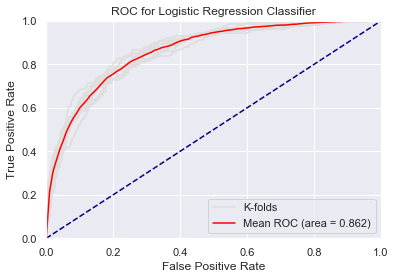

K Nearest Neighbors Classifier:
fold No.:  1
fold No.:  2
fold No.:  3
fold No.:  4
fold No.:  5
fold No.:  6
fold No.:  7
fold No.:  8
fold No.:  9
fold No.:  10


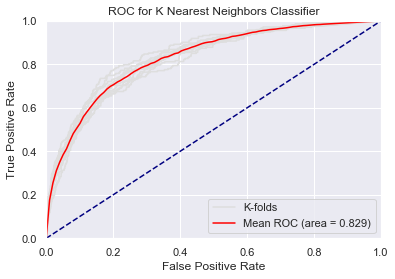

Naive Bayes Classifier:
fold No.:  1
fold No.:  2
fold No.:  3
fold No.:  4
fold No.:  5
fold No.:  6
fold No.:  7
fold No.:  8
fold No.:  9
fold No.:  10


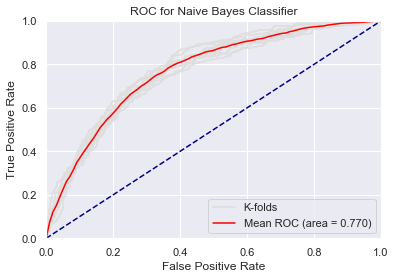

ANN Classifier:
fold No.:  1
fold No.:  2
fold No.:  3
fold No.:  4
fold No.:  5
fold No.:  6
fold No.:  7
fold No.:  8
fold No.:  9
fold No.:  10


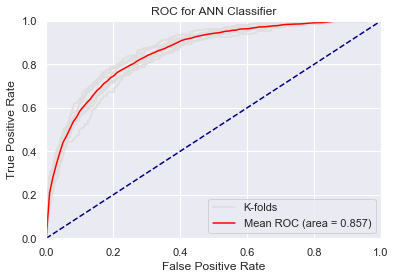

Random Forest Classifier:
fold No.:  1
fold No.:  2
fold No.:  3
fold No.:  4
fold No.:  5
fold No.:  6
fold No.:  7
fold No.:  8
fold No.:  9
fold No.:  10


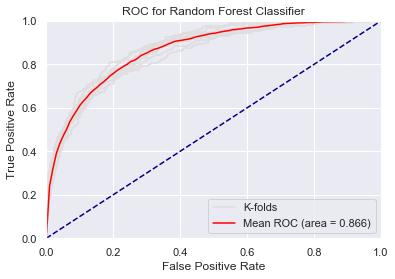

Adaptive Boost Classifier:
fold No.:  1
fold No.:  2
fold No.:  3
fold No.:  4
fold No.:  5
fold No.:  6
fold No.:  7
fold No.:  8
fold No.:  9
fold No.:  10


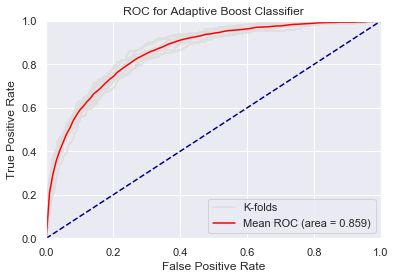

In [125]:
for clf in classifiers:
    KfoldPlot(X, labels, clf, 10)

## Loss and Validation 

In [126]:
# for clf_ in classifiers:
#     clf_name = clf_[0]
#     clf = clf_[1]
#     params = clf.get_params()
# #     params['validation_fraction']  =0.33
# #     params['verbose'] = True
# #     params['early_stopping'] = True
#     print(params)
#     clf.set_params(**params)
# #     clf.fit(X, labels)
#     clf.fit(X_train, y_train)
# #     plt.plot(clf.loss_curve_)
# #     plt.plot(clf.validation_scores_)
#     plt.show()

## Confusion Matrix

[[4430    0]
 [ 128  563]]


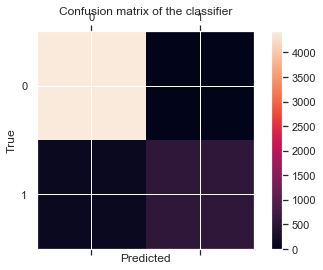

In [127]:
cm = confusion_matrix(y_test, rfclf3.predict(X_test)) 
print (cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Classifers Weighted Accuracy

In [128]:
def weighted_accuracy(cm):
    TN, FP, FN,TP = cm.ravel()
#     print ( '{} {} {} {}'.format(TN, FP, FN,TP))
    return (TP + TN)/(TP + TN + FP + 5*FN)     

In [129]:
for clf_ in classifiers:
    clf_name = clf_[0]
    clf = clf_[1]
    clf.fit(X_train, y_train)
    cm = confusion_matrix(y_test, clf.predict(X_test))
    wa = weighted_accuracy(cm)
    print ('{} : {}'.format(clf_name, wa))

Logistic Regression : 0.6538849646821393
K Nearest Neighbors : 0.5922355737488446
Naive Bayes : 0.6224570257057247
ANN : 0.6456816559600286
Random Forest : 0.6464990768356768
Adaptive Boost : 0.6560647679629897


## Classifiers comparison

In [130]:
# Logging for Visual Comparison
log_cols=["Classifier", "AUC", "Accuracy", "Weighted Accuracy"]
log = pd.DataFrame(columns=log_cols)

for clf_ in classifiers:
    clf_name = clf_[0]
    clf = clf_[1]
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_train)
    y_proba = clf.predict_proba(X_test)[:, 1]
    
    auc_ = clf_[2]
    acc_ = clf_[3]
#     auc_ = roc_auc_score(y_test, y_proba)
#     acc_ = cross_val_score(clf, X, labels, cv=10).mean()
    
    cm = confusion_matrix(y_test, clf.predict(X_test))
    w_acc_ = weighted_accuracy(cm)

    log_entry = pd.DataFrame([[clf_name, auc_*100, acc_*100, w_acc_*100]], columns=log_cols)
    log = log.append(log_entry)

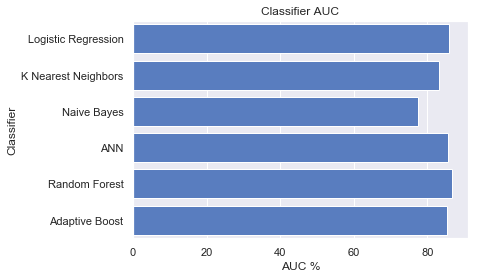

In [131]:
sns.set_color_codes("muted")
sns.barplot(x='AUC', y='Classifier', data=log, color="b")

plt.xlabel('AUC %')
plt.title('Classifier AUC')
plt.show()

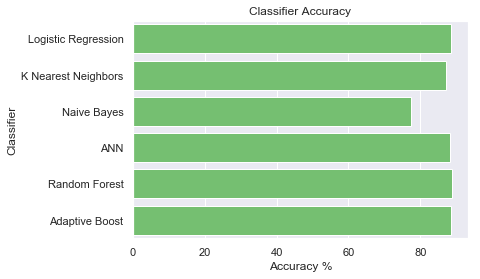

In [132]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

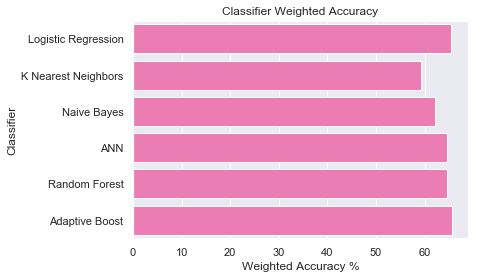

In [133]:
sns.set_color_codes("muted")
ax = sns.barplot(x='Weighted Accuracy', y='Classifier', data=log, color="#FF69B4")

plt.xlabel('Weighted Accuracy %')
plt.title('Classifier Weighted Accuracy')

plt.show()

# 5. Classifier Prediction

In [134]:
test_proba = pd.DataFrame(data = rfclf3.predict_proba(X_Test_df)[:, 1])

test_proba.reset_index(level=0,inplace = False)
test_proba.columns = ['pred_proba']

In [135]:
test_proba.to_csv('Submission_group_17.csv')
# test_proba

In [136]:
Test_proba_df = pd.read_csv('Submission_group_17.csv', index_col=0)
Test_proba_df.head()

,pred_proba
0,0.033339
1,0.189339
2,0.010900
3,0.091980
4,0.050428
